# Host Optimal Price Predictions

## Problem Statement

Business problem statement 
One challenge that every hosts face is determining the optimal nightly rent price. In many areas, renters aka. hosts are presented with a good selection of listings and can filter by criteria like price, number of bedrooms, room type, and more. The amount a host can charge is ultimately tied to market prices.
Although there are general guidance which hosts should follow for pricing, there are no easy way to access methods to determine the optimal price to rent out a space. 
There are other models available on the market where one method could be to find a few listings that are similar to the place that will be up for rent, average the listed prices and set our price to this calculated average price. But the market is dynamic, so we would want to update the price frequently and this method can become tedious.
To identify the growth of the business using a public dataset from Airbnb.,, Analyzing and building the model on how it will perform based on the current business situation and to build a optimal pricing system for the hosts who would opt when they post their properties for rent at the best price. 
Our approach of analysis will include Exploratory Data Analysis (EDA) done on the public dataset we obtained, which may involve in data cleansing, visualization for further analysis of each variable or attribute.
Moving further, we plan to develop a supervised learning model based on regression to predict the price based on the historic data of the rental price, service charge with the aid of various regression methods or algorithms.
      In summary, we are going to create a model that helps in predicting the optimal prices with a public dataset available.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,10]
plt.style.use('fivethirtyeight')

## Data Dictionary

In [2]:
pd.set_option('display.max_colwidth',None)
data_dict=pd.read_excel('Data type dictionary.xlsx')
data_dict

,Features,Data type,Description
0,id,integer,Airbnb's unique identifier for the listing
1,name,text,Name of the listing
2,host_id,integer,Airbnb's unique identifier for the host.
3,host_name,text,Name of the host.
4,host_since,date,The date the host was created. For hosts that are Airbnb guests this could be the date they registered as a guest.
5,host_is_superhost,boolean,To check if the host is a superhost or not.
6,host_identity_verified,boolean,To check if the host is identified or not.
7,instant_bookable,boolean,To check whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.
8,accommodates,integer,The maximum capacity of the listing
9,amenities,object,The amenities provided by the host


In [3]:
df_original=pd.read_csv('airbnb.csv')

In [4]:
df=pd.read_csv('airbnb.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158249 entries, 0 to 158248
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              158249 non-null  int64  
 1   name                            158231 non-null  object 
 2   host_id                         158249 non-null  int64  
 3   host_name                       158220 non-null  object 
 4   host_since                      158220 non-null  object 
 5   host_is_superhost               158220 non-null  object 
 6   host_identity_verified          158220 non-null  object 
 7   instant_bookable                158249 non-null  object 
 8   accommodates                    158249 non-null  int64  
 9   amenities                       158249 non-null  object 
 10  State                           158249 non-null  object 
 11  neighbourhood_group             158249 non-null  object 
 12  neighbourhood   

In [6]:
pd.set_option('display.max_columns',30)
df.head()

,id,name,host_id,host_name,host_since,host_is_superhost,host_identity_verified,instant_bookable,accommodates,amenities,State,neighbourhood_group,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRADED*,521,Paolo,27-06-2008,f,t,f,6,"[""Elevator"", ""Cable TV"", ""Air conditioning"", ""Carbon monoxide alarm"", ""Indoor fireplace"", ""Hangers"", ""Kitchen"", ""Hair dryer"", ""Fire extinguisher"", ""Heating"", ""Free parking on premises"", ""Pool"", ""Laptop-friendly workspace"", ""Gym"", ""Washer"", ""First aid kit"", ""Smoke alarm"", ""Iron"", ""Wifi"", ""TV"", ""Hot tub"", ""Essentials"", ""Shampoo"", ""Dryer""]",California,Los Angeles,Culver City,33.98209,-118.38494,Entire condominium,Entire home/apt,2.0,2.0,3.0,115,30,730,2,15-05-2016,0.02,1,216
1,2708,Beautiful Furnish Mirrored Mini-Suite w/ Fireplace,3008,Chas.,16-09-2008,t,t,t,1,"[""Host greets you"", ""Elevator"", ""Air conditioning"", ""Carbon monoxide alarm"", ""Indoor fireplace"", ""Hangers"", ""Kitchen"", ""Hair dryer"", ""Garden or backyard"", ""Fire extinguisher"", ""Heating"", ""Free parking on premises"", ""Luggage dropoff allowed"", ""Single level home"", ""Laptop-friendly workspace"", ""Gym"", ""Washer"", ""Dishes and silverware"", ""Refrigerator"", ""First aid kit"", ""Smoke alarm"", ""Patio or balcony"", ""Free street parking"", ""Iron"", ""Coffee maker"", ""Wifi"", ""Hot tub"", ""Hot water"", ""Essentials"", ""Shampoo"", ""Bed linens"", ""Microwave"", ""Oven"", ""Extra pillows and blankets"", ""Breakfast"", ""Stove"", ""Dryer"", ""Dishwasher"", ""Cooking basics"", ""Long term stays allowed""]",California,Los Angeles,Hollywood,34.09768,-118.34602,Private room in apartment,Private room,1.5,1.0,1.0,71,30,366,27,06-10-2020,0.35,2,360
2,2732,Zen Life at the Beach,3041,Yoga Priestess,17-09-2008,f,t,f,1,"[""Cooking basics"", ""Host greets you"", ""Smoke alarm"", ""Patio or balcony"", ""Refrigerator"", ""Microwave"", ""Oven"", ""Dishes and silverware"", ""Wifi"", ""Dryer"", ""Kitchen"", ""Hangers"", ""Washer"", ""Hair dryer"", ""Essentials"", ""Heating"", ""Shampoo""]",California,Los Angeles,Santa Monica,34.00475,-118.48127,Private room in apartment,Private room,1.0,1.0,1.0,155,1,180,21,27-12-2019,0.18,2,337
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,25-09-2008,f,t,t,2,"[""Host greets you"", ""Air conditioning"", ""Carbon monoxide alarm"", ""Hangers"", ""Hair dryer"", ""Heating"", ""Free parking on premises"", ""Laptop-friendly workspace"", ""Washer"", ""Refrigerator"", ""Smoke alarm"", ""Free street parking"", ""Iron"", ""Wifi"", ""TV"", ""Hot water"", ""Essentials"", ""Bed linens"", ""Microwave"", ""Extra pillows and blankets"", ""Dryer"", ""Long term stays allowed""]",California,Los Angeles,Bellflower,33.87619,-118.11397,Entire apartment,Entire home/apt,1.0,1.0,1.0,50,30,730,0,NaN,NaN,1,0
4,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,05-03-2009,t,t,f,2,"[""Lock on bedroom door"", ""Fire extinguisher"", ""Carbon monoxide alarm"", ""Hangers"", ""Hair dryer"", ""Garden or backyard"", ""Heating"", ""Private entrance"", ""Laptop-friendly workspace"", ""Washer"", ""Smoke alarm"", ""Patio or balcony"", ""Free street parking"", ""Iron"", ""Coffee maker"", ""Wifi"", ""TV"", ""Hot water"", ""Essentials"", ""Shampoo"", ""Microwave"", ""Dryer""]",California,Los Angeles,Del Rey,33.98750,-118.43200,Private room in tiny house,Private room,1.0,1.0,1.0,60,30,1125,310,29-04-2020,2.25,5,337


In [7]:
# Describing the Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,158249.0,2.687799e+07,1.391386e+07,109.00000,1.580795e+07,2.820817e+07,3.987237e+07,4.694186e+07
host_id,158249.0,9.960864e+07,1.045460e+08,470.00000,1.483732e+07,5.467153e+07,1.575800e+08,3.791734e+08
accommodates,158249.0,3.857617e+00,2.644270e+00,0.00000,2.000000e+00,3.000000e+00,5.000000e+00,1.600000e+01
latitude,158249.0,3.470195e+01,6.938362e+00,18.92857,3.283720e+01,3.612252e+01,4.068729e+01,4.773489e+01
longitude,158249.0,-1.067489e+02,2.796584e+01,-159.72213,-1.219366e+02,-1.171594e+02,-7.700699e+01,-7.371087e+01
bathrooms,158065.0,1.437611e+00,8.781675e-01,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
bedrooms,141614.0,1.638313e+00,1.061445e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
beds,156965.0,2.088950e+00,1.790110e+00,0.00000,1.000000e+00,2.000000e+00,3.000000e+00,6.600000e+01
price,158249.0,2.043707e+02,5.002285e+02,0.00000,7.500000e+01,1.200000e+02,2.000000e+02,2.500000e+04
minimum_nights,158249.0,6.459666e+02,2.513793e+05,1.00000,2.000000e+00,3.000000e+00,3.000000e+01,1.000000e+08


In [8]:
# Describing the Categorical Columns
df.select_dtypes(exclude=np.number).describe().T

,count,unique,top,freq
name,158231,152409,A place of your own | 1BR in Las Vegas,73
host_name,158220,22911,Kia,1541
host_since,158220,4231,16-12-2016,1156
host_is_superhost,158220,2,f,105684
host_identity_verified,158220,2,t,126832
instant_bookable,158249,2,f,88815
amenities,158249,136181,[],401
State,158249,9,California,56408
neighbourhood_group,158249,21,Los Angeles,31471
neighbourhood,158249,935,Las Vegas,9156


In [9]:
# Numerical Columns
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['id', 'host_id', 'accommodates', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [10]:
# categorical Columns
cat_cols=df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['name', 'host_name', 'host_since', 'host_is_superhost',
       'host_identity_verified', 'instant_bookable', 'amenities', 'State',
       'neighbourhood_group', 'neighbourhood', 'property_type', 'room_type',
       'last_review'],
      dtype='object')

In [11]:
df.nunique().sort_values(ascending=False)

id                                158234
name                              152409
amenities                         136181
latitude                          100630
longitude                          98534
host_id                            86089
host_name                          22911
host_since                          4231
last_review                         2369
price                               1777
reviews_per_month                   1159
neighbourhood                        935
number_of_reviews                    655
maximum_nights                       510
availability_365                     366
minimum_nights                       158
property_type                        132
calculated_host_listings_count       131
beds                                  43
bathrooms                             39
bedrooms                              23
neighbourhood_group                   21
accommodates                          17
State                                  9
room_type       

In [12]:
df['State'].unique()

array(['California', 'Illinois', 'Florida', 'Hawaii', 'Nevada',
       'New York ', 'Tennessee', 'DC', 'Washington'], dtype=object)

In [13]:
df['neighbourhood'].unique()

array(['Culver City', 'Hollywood', 'Santa Monica', 'Bellflower',
       'Del Rey', 'Atwater Village', 'Long Beach', 'Venice',
       'Redondo Beach', 'Mid-Wilshire', 'Harbor Gateway',
       'Hollywood Hills', 'Torrance', 'Mid-City', 'Valley Village',
       'East Hollywood', 'Silver Lake', 'Highland Park',
       'Mount Washington', 'Sawtelle', 'West Los Angeles',
       'Woodland Hills', 'Los Feliz', 'Mar Vista', 'Malibu', 'Downtown',
       'Van Nuys', 'Lynwood', 'Glendale', 'Beverly Hills', 'Carthay',
       'Harvard Heights', 'Glassell Park', 'West Hollywood',
       'Cheviot Hills', 'Encino', 'Lakewood', 'View Park-Windsor Hills',
       'North Hills', 'Tujunga', 'Westchester', 'Echo Park',
       'Sherman Oaks', 'Carson', 'North Hollywood', 'Altadena',
       'Calabasas', 'Pacific Palisades', 'Hollywood Hills West',
       'Topanga', 'Valley Glen', 'Fairfax', 'Manhattan Beach',
       'Unincorporated Santa Monica Mountains', 'Elysian Valley', 'Palms',
       'Pico-Robertson', 'S

In [14]:
df['neighbourhood_group'].unique()

array(['Los Angeles', 'San Diego County', 'San Francisco', 'San Mateo',
       'Saint Clara County', ' Santa Cruz', 'Chicago', 'Broward County',
       'Hawaii', 'Kauai', 'Maui', 'Honolulu', 'Clark County', 'Manhattan',
       'Brooklyn', 'Queens', 'Staten Island', 'Bronx', 'Nashville',
       'Washington D.C', 'Seattle'], dtype=object)

In [15]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [16]:
df['accommodates'].unique()

array([ 6,  1,  2,  3,  4,  5,  8,  7, 10, 15, 12, 16,  9, 14, 11, 13,  0],
      dtype=int64)

In [17]:
df['bedrooms'].unique()

array([ 2.,  1., nan,  3.,  4.,  6.,  5.,  7.,  9.,  8., 11., 12., 10.,
       13., 50., 21., 14., 17., 16., 22., 15., 18., 37., 27.])

In [18]:
# initial and latest recorded year
min(pd.to_datetime(df['host_since'])),max(pd.to_datetime(df['host_since']))

(Timestamp('2008-02-12 00:00:00'), Timestamp('2020-12-11 00:00:00'))

**host_since:** we have data starting from 2008 to 2020

In [19]:
# Replacing blank with null and changing last_review & host_since columns to datetime format
df['last_review'] = pd.to_datetime(df['last_review'].replace(' ',np.nan))
df['host_since'] = pd.to_datetime(df['host_since'].replace(' ',np.nan))

In [20]:
# Spliting the Timestamp into year and month for host_since
df['host_since_yr']=pd.to_datetime(df['host_since']).dt.year
df['host_since_mnth']=pd.to_datetime(df['host_since']).dt.month
df.insert(loc=2, column='host_since_yr', value=df.pop('host_since_yr'))
df.insert(loc=3, column='host_since_mnth', value=df.pop('host_since_mnth'))

In [21]:
# Spliting the Timestamp into year and month for last_review
df['last_review_yr']=pd.to_datetime(df['last_review'],errors='coerce').dt.year
df['last_review_mnth']=pd.to_datetime(df['last_review'],errors='coerce').dt.month
df.insert(loc=26, column='last_review_yr', value=df.pop('last_review_yr'))
df.insert(loc=27, column='last_review_mnth', value=df.pop('last_review_mnth'))

In [22]:
# Dropping the redundant columns
df=df.drop(columns=['host_since','last_review'])

### Numerical Columns - Analysis of distribution

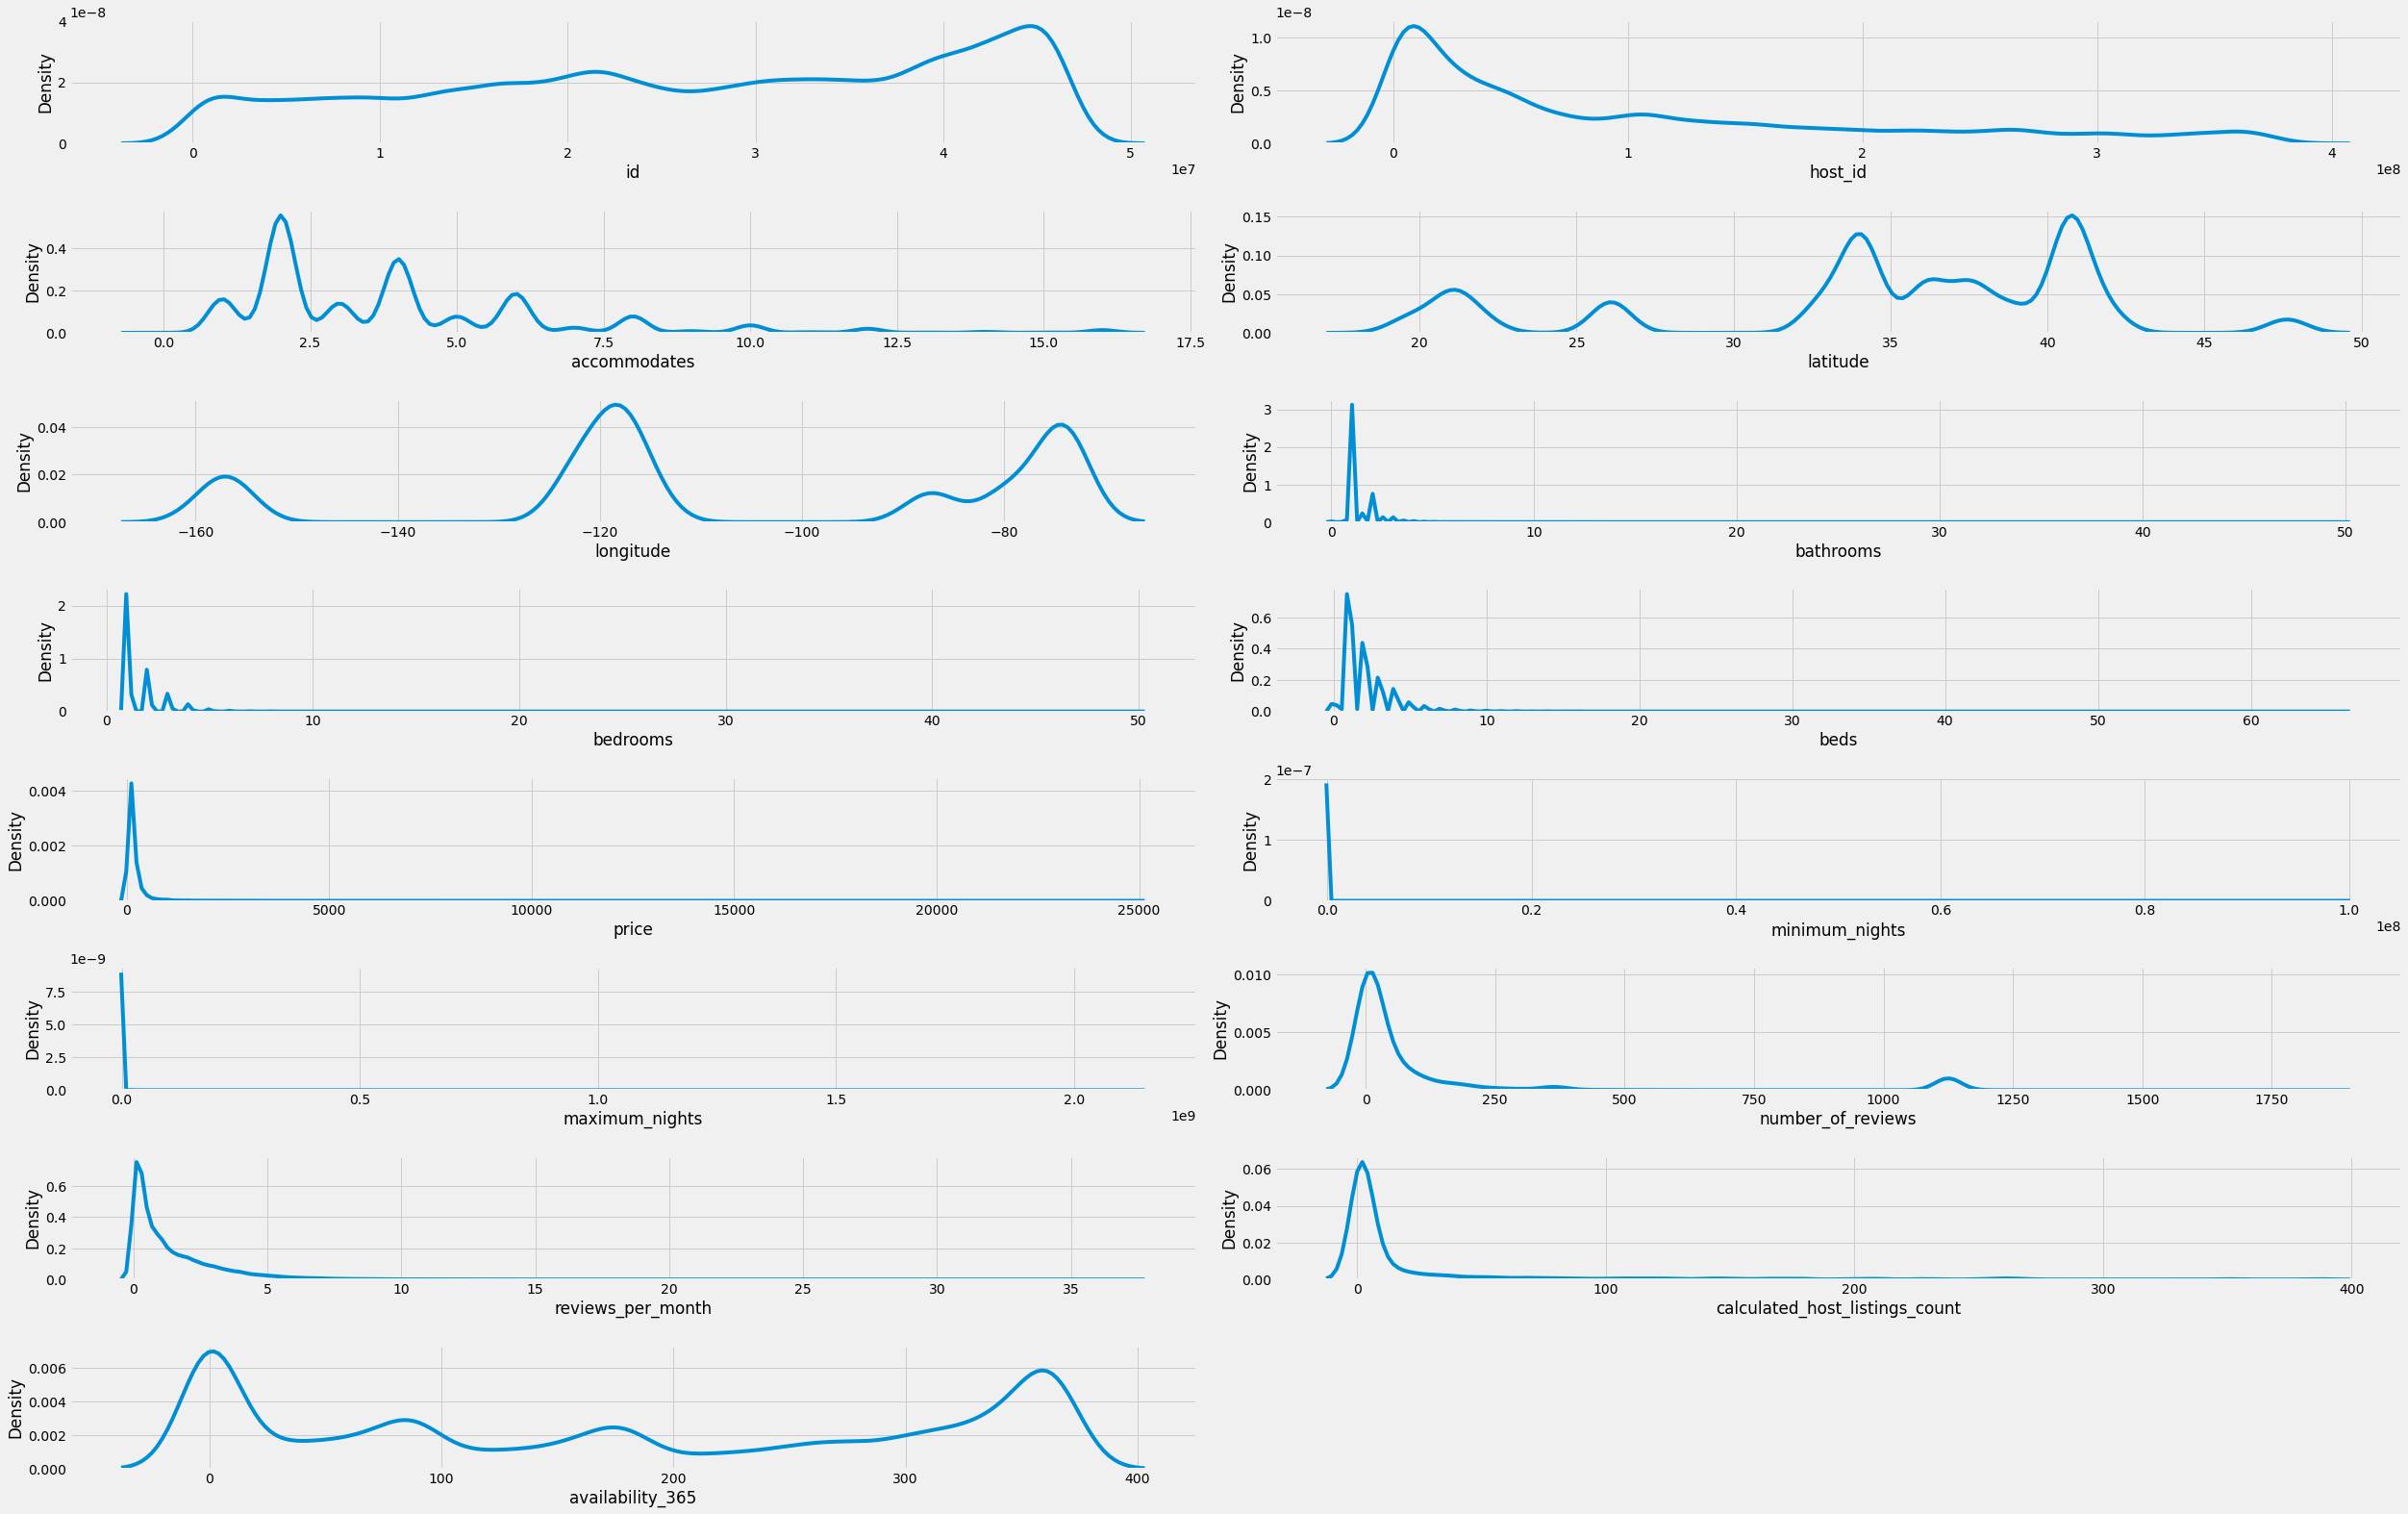

In [23]:
iterator=1
plt.rcParams['figure.figsize']=[35,27]
for i in num_cols:
    
    plt.subplot(10,2,iterator)
    #plt.title(i)
    sns.kdeplot(df[i])
    iterator+=1
plt.tight_layout()
plt.show()

In [24]:
skew=df.loc[:,list(num_cols)].skew()
d=pd.DataFrame()
d['skewness']=skew
def skew1(i):
    #print(i)
    if float(i) > 0.5:
        return 'Positive'
    elif i <  -0.5:
        return 'Negative'
    else:
        return 'Normal'

d['skewness_type']=d['skewness'].apply(skew1)
        
# skewness of numerical columns in the dataset
d

,skewness,skewness_type
id,-0.278879,Normal
host_id,1.073491,Positive
accommodates,1.739753,Positive
latitude,-0.816761,Negative
longitude,-0.327570,Normal
bathrooms,5.498819,Positive
bedrooms,3.568073,Positive
beds,4.687372,Positive
price,22.880892,Positive
minimum_nights,397.805222,Positive


**The skewness of the numerical columns are explained by the above dataframe.**

In [25]:
# Standard deviation over each numerical columns
df.loc[:,list(num_cols)].std()

id                                1.391386e+07
host_id                           1.045460e+08
accommodates                      2.644270e+00
latitude                          6.938362e+00
longitude                         2.796584e+01
bathrooms                         8.781675e-01
bedrooms                          1.061445e+00
beds                              1.790110e+00
price                             5.002285e+02
minimum_nights                    2.513793e+05
maximum_nights                    5.410484e+06
number_of_reviews                 2.780842e+02
reviews_per_month                 1.638515e+00
calculated_host_listings_count    4.888697e+01
availability_365                  1.391774e+02
dtype: float64

#### All columns are having certain standard deviation, thus each columns are significant and adds value to the model.

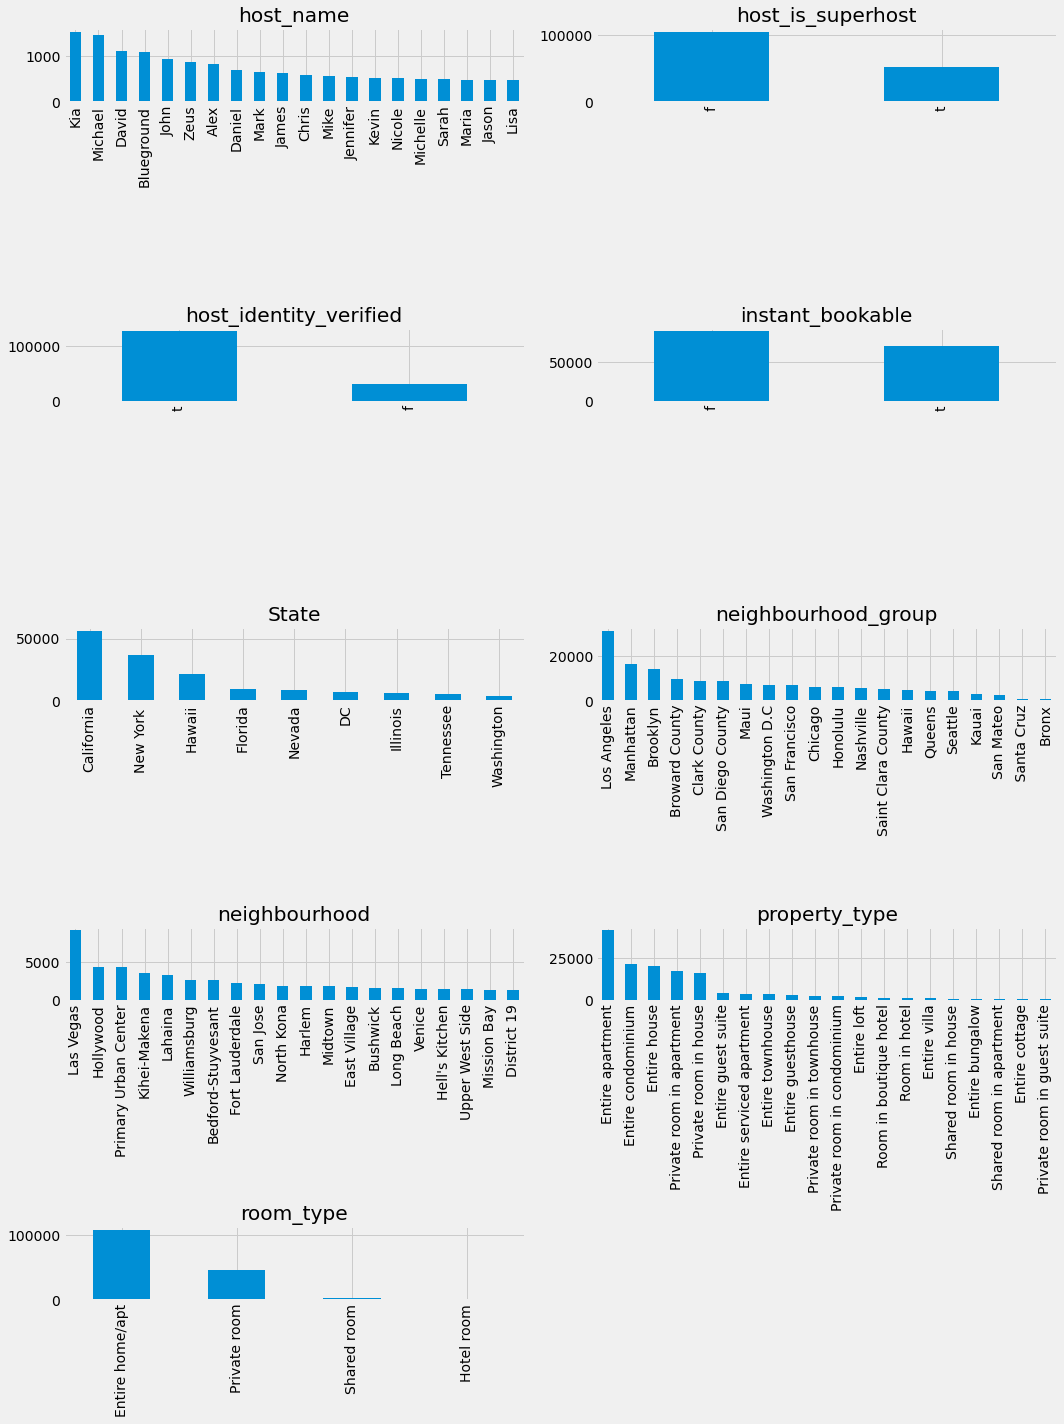

In [26]:
cat_cols1=['host_name', 'host_is_superhost', 'host_identity_verified',
       'instant_bookable', 'State', 'neighbourhood_group',
       'neighbourhood', 'property_type', 'room_type']
# Categorical columns
iterator=1
plt.rcParams['figure.figsize']=[15,20]
for i in cat_cols1:
    plt.subplot(5,2,iterator)
    plt.title(i)
    df[i].value_counts()[:20].plot(kind='bar')
    iterator+=1
    
plt.tight_layout()
plt.show()

* **Host_name:** Kia has the highest number of listings in Seattle, followed by Micheal and David.
* **Host_is_superhost:** Majority of the hosts are not super hosts.
* **Host_is_verified:** Majority of the hosts are verified.
* **Instant_bookable:** Instant bookable option is not available in most of the listings.
* **State:** California has the highest number of listings followed by Newyork.
* **Neighbourhood_group:** Los Angeles has the highest number of listing in the neighbourhood group.
* **Neighbourhood:** Los Vegas has the highest number of listing in the neighbourhood.
* **Property_Type:** Entire Appartment has the highest count in the property listings based on property type.
* **Room_type:** Entire home/Apt has the highest count in the property listings based on room type.



#### target variable analysis

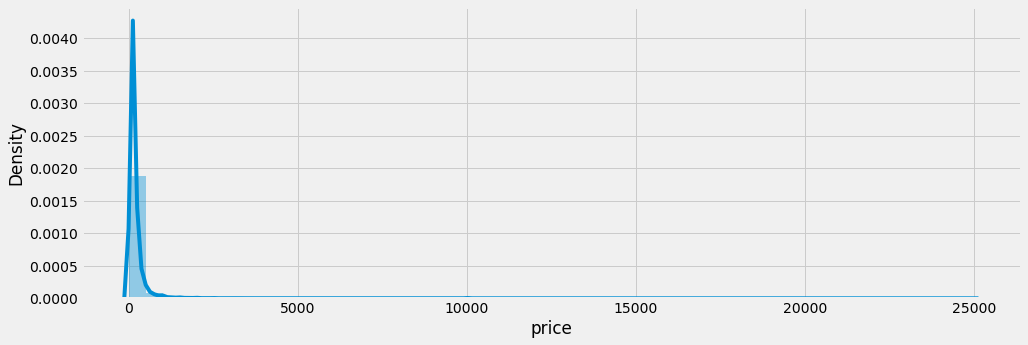

Skewness of price variable:  22.880891758896077


In [27]:
plt.rcParams['figure.figsize']=[15,5]
sns.distplot(df['price'])
plt.show()
print('Skewness of price variable: ',df['price'].skew())

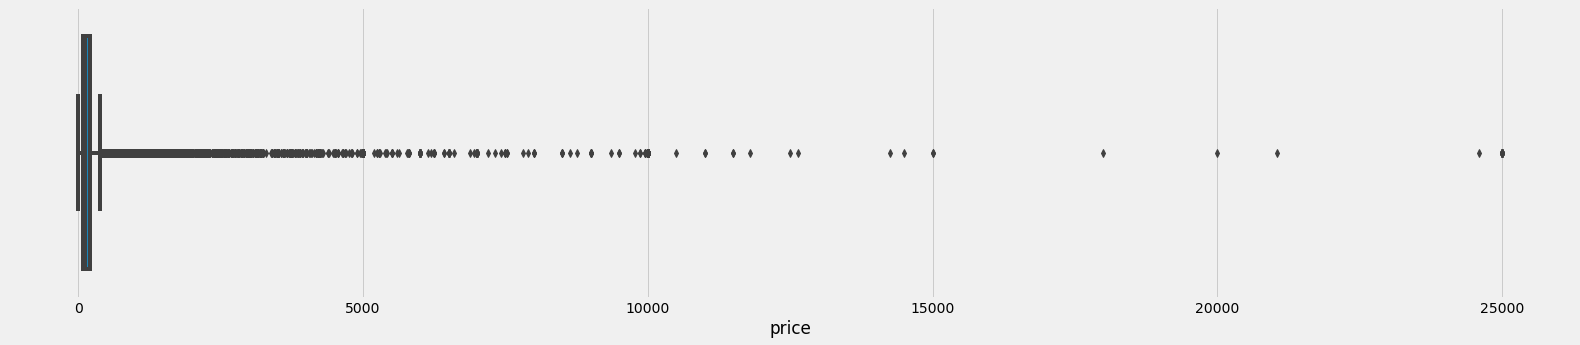

In [28]:
plt.rcParams['figure.figsize']=[25,5]
sns.boxplot(df['price'])
plt.show()

* **Target Variable(Price):** we can see that there are more number of outliers present in the target data.

### Bivariate Analysis

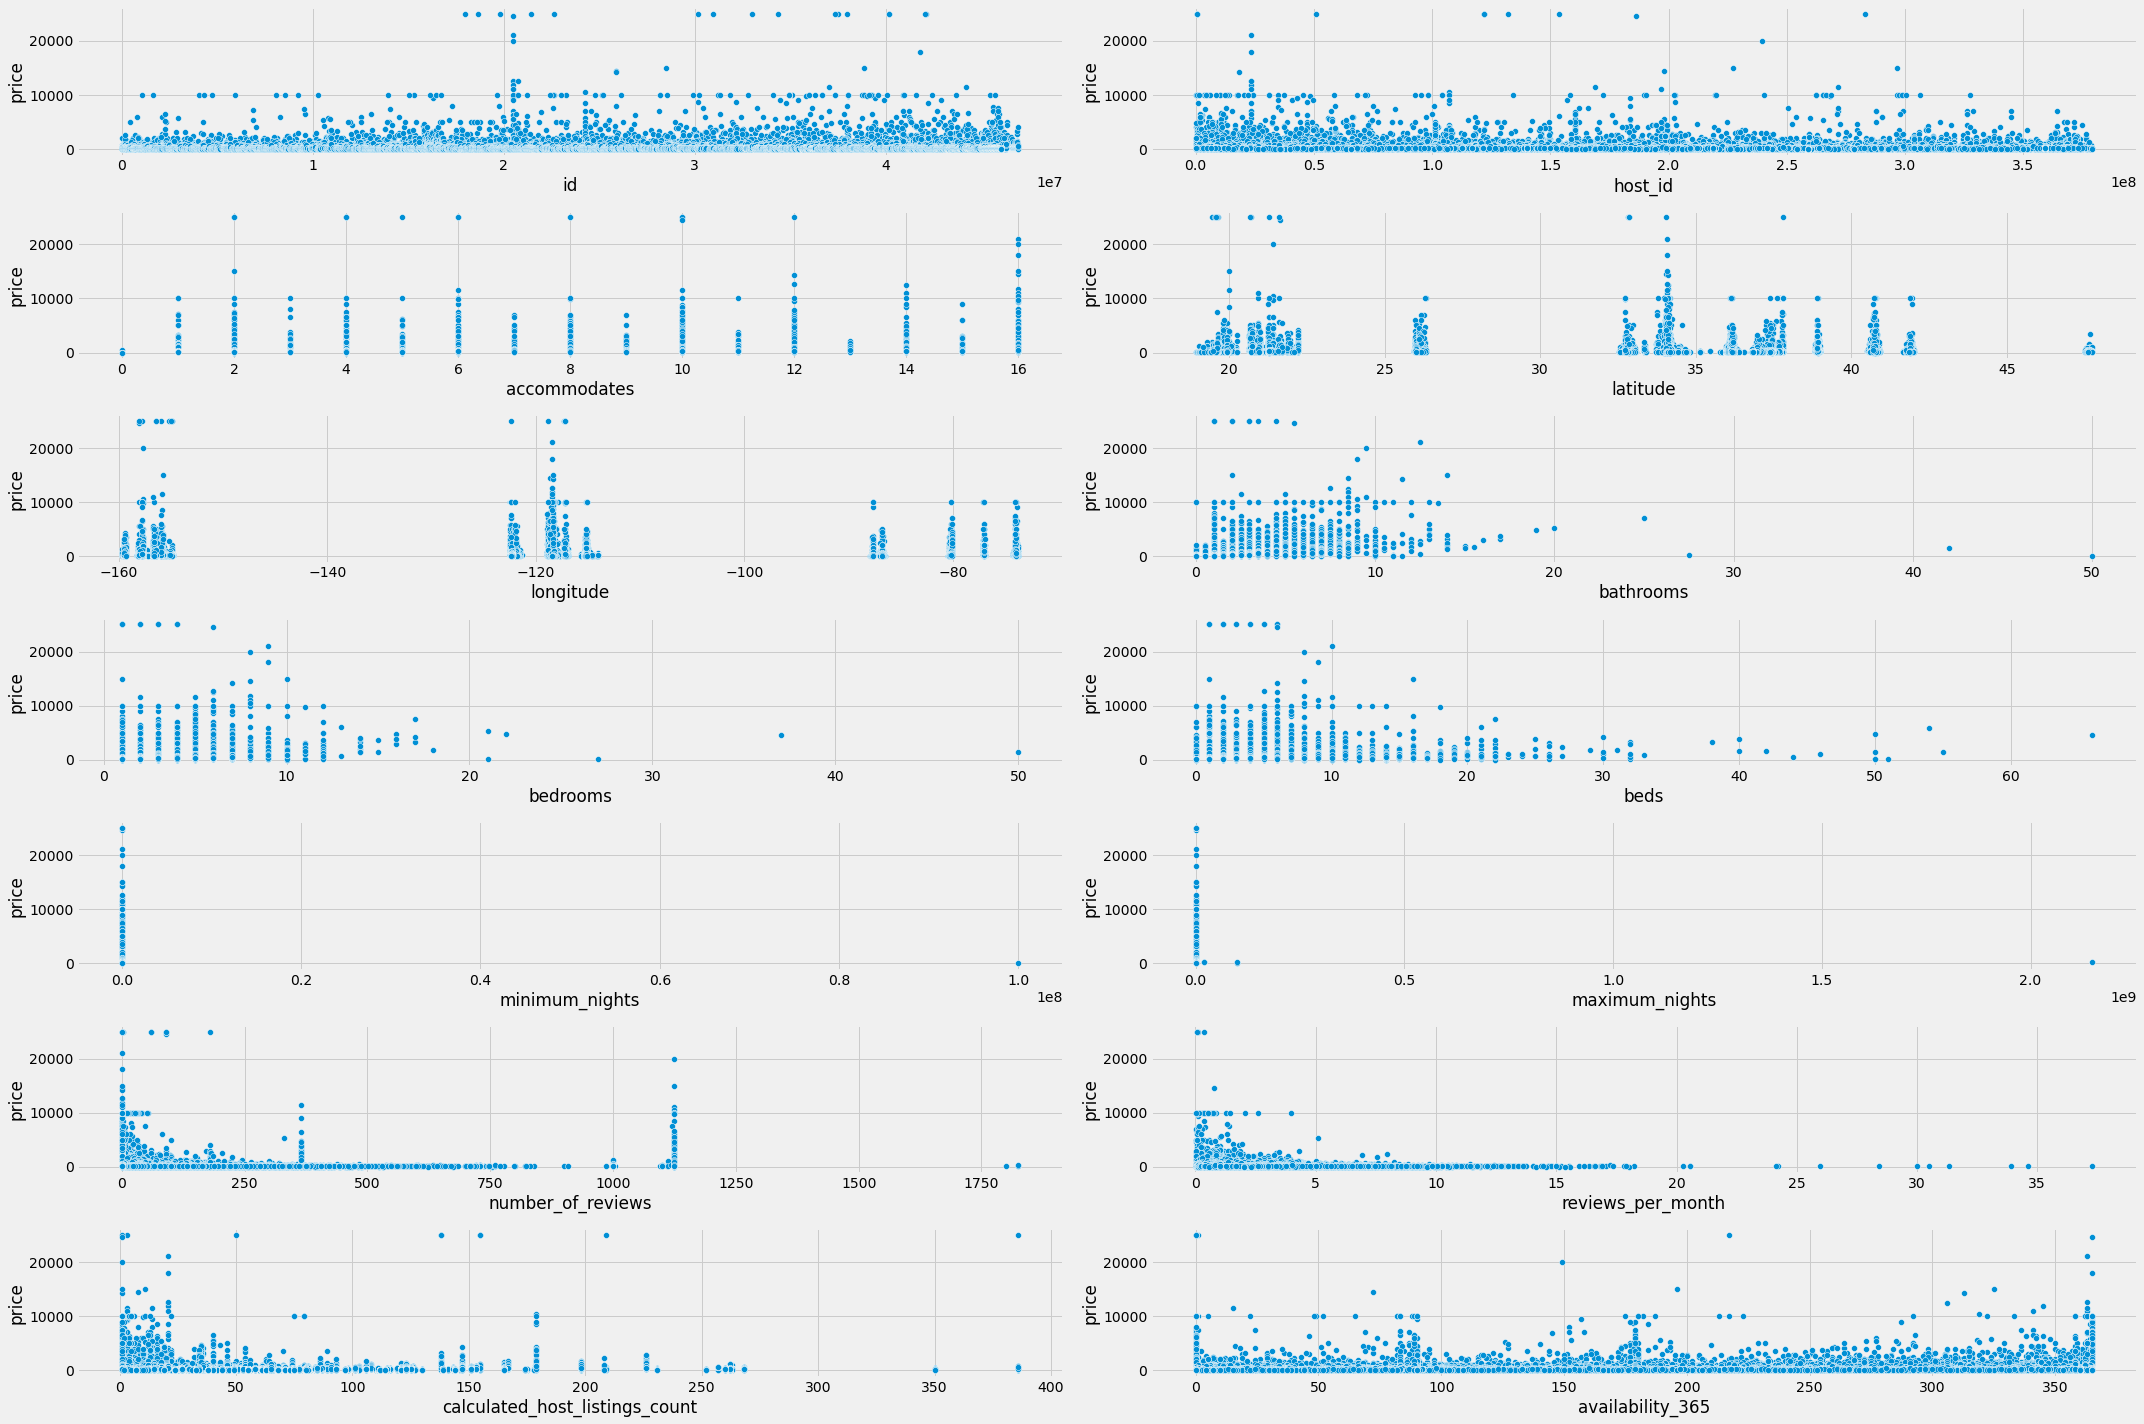

In [29]:
num_cols = ['id', 'host_id', 'accommodates', 'latitude', 'longitude', 'bathrooms',
            'bedrooms', 'beds',  'minimum_nights', 'maximum_nights',
            'number_of_reviews', 'reviews_per_month',
            'calculated_host_listings_count', 'availability_365']
# Numerical columns
iterator=1
plt.rcParams['figure.figsize']=[30,20]
for i in num_cols:
    plt.subplot(7,2,iterator)
    sns.scatterplot(df[i],df['price'])
    iterator+=1
plt.tight_layout()
plt.show()


**From the above graphs we can see that there isn't much relationship between the target variable and the numerical variable**

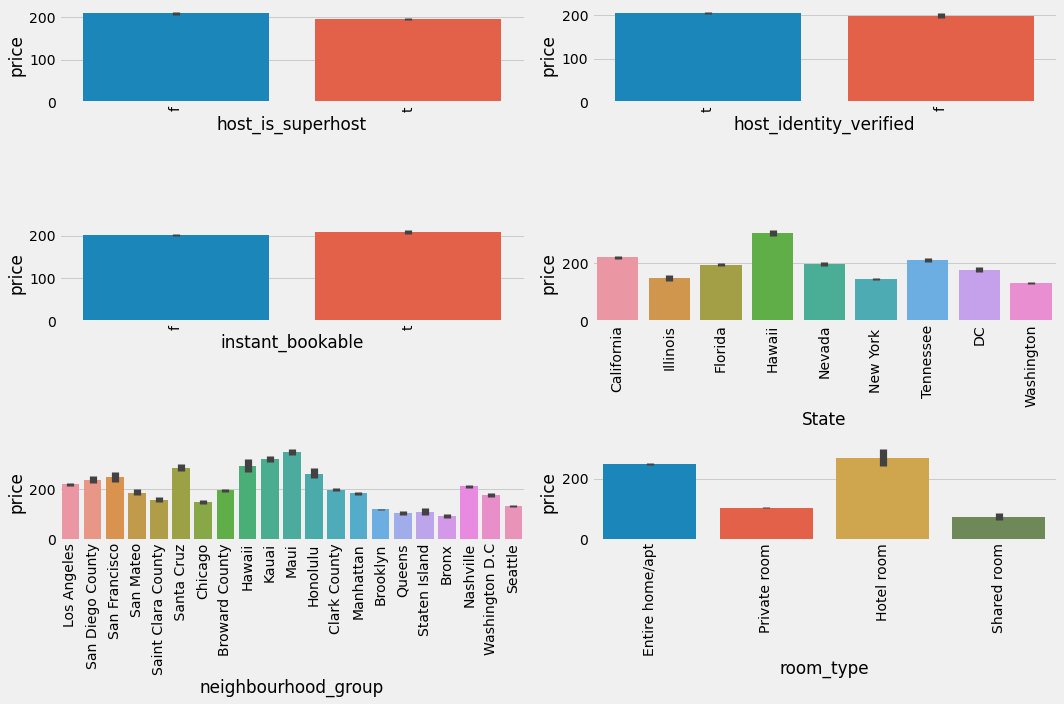

In [30]:
ccols1=['host_is_superhost',
     'host_identity_verified',
     'instant_bookable',
     'State',
     'neighbourhood_group',
     'room_type']
#Cat vs Num
r=3
c=2
itr=1
plt.rcParams['figure.figsize']=[15,10]
for i in ccols1:
    plt.subplot(r,c,itr)
    plt.xticks(rotation=90)
    sns.barplot(data=df,x=i,y='price')
    #df.groupby(i)['price'].mean().plot(kind='bar')
    itr+=1
plt.tight_layout()
plt.show()

* **Host_is_superhost:** Average prices are almost equal for both superhosts and non-superhosts.
* **Host_is_verified:** Average prices are almost equal for the listings which are verified and unverified.
* **Instant_bookable:** Average prices are almost equal whether there is a availability of instant booking or not.
* **State:** Average price in Hawaii is greater than compared to other states.
* **Neighbourhood_group:** Average price in Maui neighbour hood group is greater than compared to others.
* **Room_type:** Average prices in hotel rooms and Entire home/apt are almost equal and higher than the other room types.



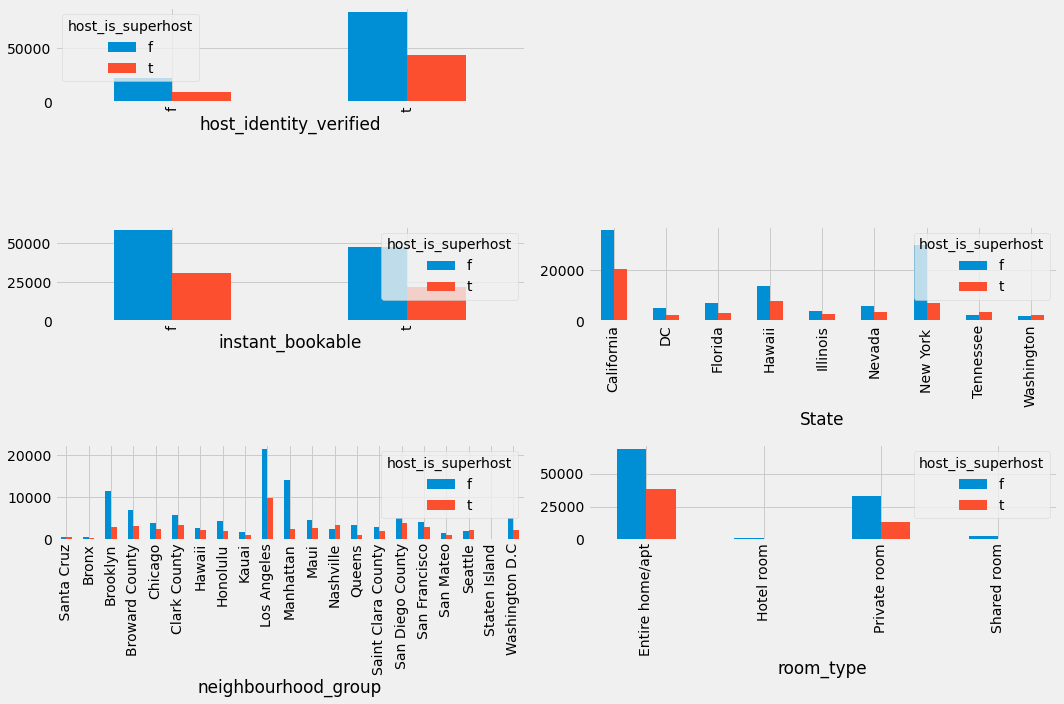

In [31]:
fig,axes=plt.subplots(3,2)
pd.crosstab(df['host_identity_verified'], df['host_is_superhost']).plot(kind='bar',ax=axes[0,0])
pd.crosstab(df['instant_bookable'], df['host_is_superhost']).plot(kind='bar',ax=axes[1,0])
pd.crosstab(df['State'], df['host_is_superhost']).plot(kind='bar',ax=axes[1,1])
pd.crosstab(df['neighbourhood_group'], df['host_is_superhost']).plot(kind='bar',ax=axes[2,0])
pd.crosstab(df['room_type'], df['host_is_superhost']).plot(kind='bar',ax=axes[2,1])
plt.delaxes(axes[0,1])
plt.tight_layout()
plt.show()

* Identify verified for superhosts is higher than non verified. 
* Instant bookability provided by superhosts are higher than non general hosts
* The highest number of superhosts are recorded in California and succeedingly Hawaii
* The number of superhosts are recorded highly in Los Angeles 
* High number of superhosts offer Entire home/Apartment type of room

### Multivariate Analysis

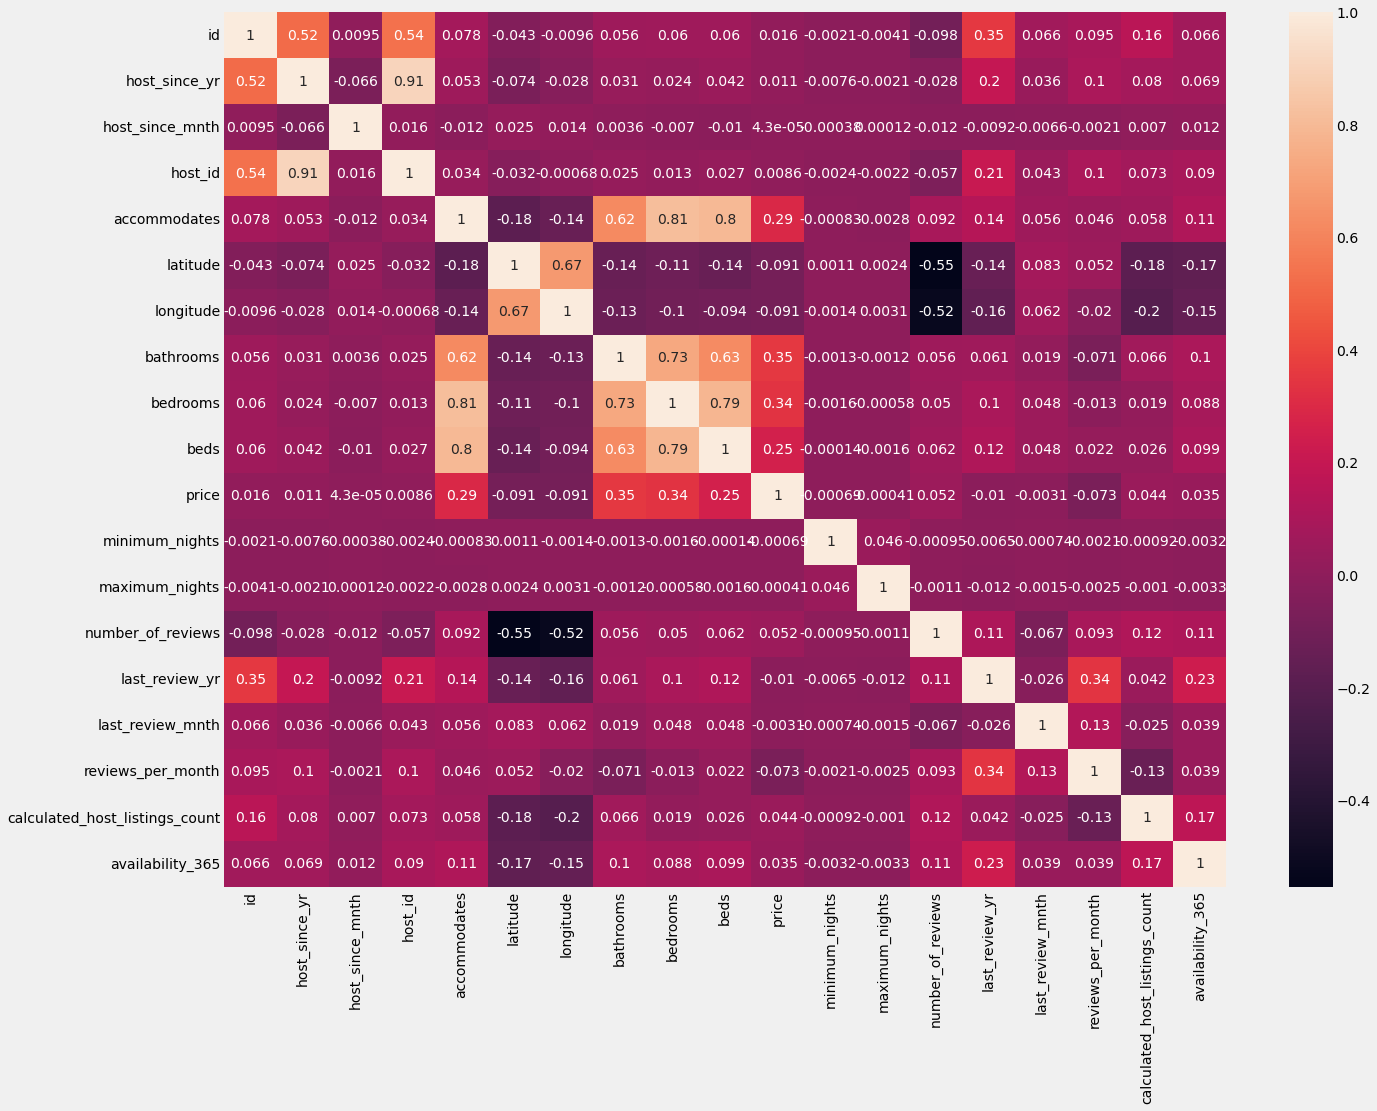

In [32]:
plt.rcParams['figure.figsize']=[20,15]
sns.heatmap(df.corr(),annot=True)
plt.show()

* On comparing with the target variable there isnt much correlation between the variables.
* But there is multi collinearity is present between the columns **accomodates, beds, bathroom and bedrooms**
* Also multicollinearity between **host id** and **Host since year**
* **Latitude** and **Longitude** has moderately strong multi collinearaity between them .

## Unique Identifier

In [33]:
df.loc[(df['id'].duplicated()),'id'].unique()

array([14906035, 45805136, 20995666, 44615487, 45546430, 45546628,
       45546789, 45546863, 45546968, 46006058, 46006560, 46006648,
       46006814, 46006931, 45623908], dtype=int64)

In [34]:
# Dropping the duplicated indentity
df['id'].drop_duplicates(inplace=True)

In [35]:
df.shape

(158249, 30)

### Missing Values

In [36]:
# row wise missing values
df.isnull().sum(axis=1)[df.isnull().sum(axis=1) == len(list(df.columns))]


# all rows are having atleast one column filled with data

Series([], dtype: int64)

In [37]:
# Column wise Null values
percentage_result = df.isnull().sum()/df.shape[0] * 100
count=df.isnull().sum()
percentage_result = pd.DataFrame({"columns": percentage_result.keys(),'count of missing':count, "% missing": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result[percentage_result['count of missing']>0]

,columns,count of missing,% missing
1,name,18,0.011374
2,host_since_yr,29,0.018326
3,host_since_mnth,29,0.018326
5,host_name,29,0.018326
6,host_is_superhost,29,0.018326
7,host_identity_verified,29,0.018326
18,bathrooms,184,0.116272
19,bedrooms,16635,10.511915
20,beds,1284,0.811380
25,last_review_yr,36556,23.100304


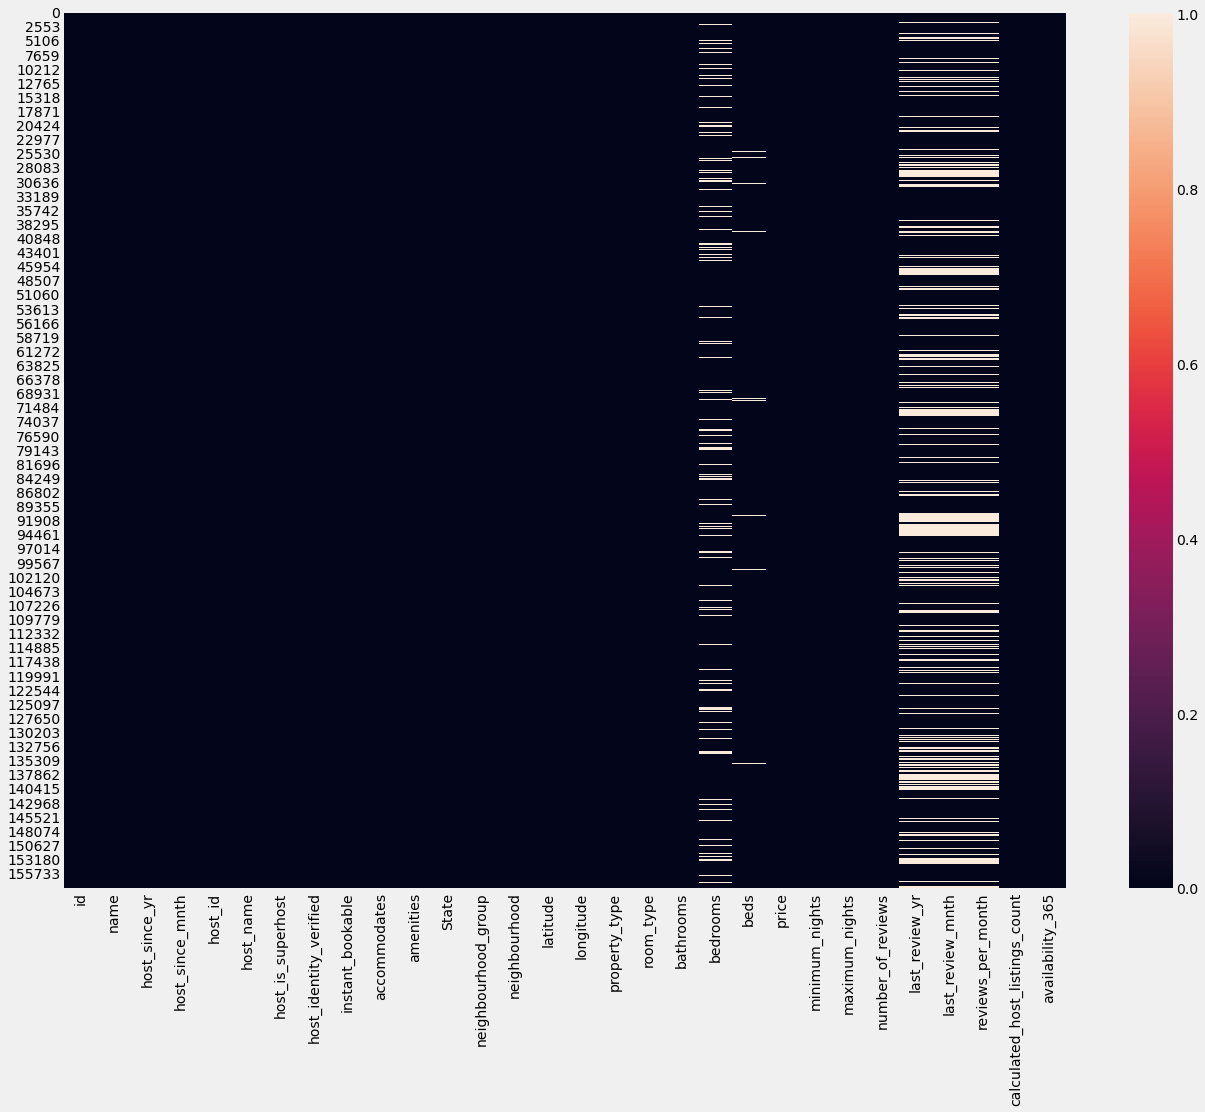

In [38]:
# Visualisation of null values in the data set
sns.heatmap(df.isnull())
plt.show()

In [39]:
# Checking for duplicated rows
df[df.duplicated()]

,id,name,host_since_yr,host_since_mnth,host_id,host_name,host_is_superhost,host_identity_verified,instant_bookable,accommodates,amenities,State,neighbourhood_group,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,last_review_yr,last_review_mnth,reviews_per_month,calculated_host_listings_count,availability_365


* **No duplicate rows identified**

### Treating Null Values

In [40]:
# Identifying the null values in host_name and other attributes
df[df.host_name.isnull()]

,id,name,host_since_yr,host_since_mnth,host_id,host_name,host_is_superhost,host_identity_verified,instant_bookable,accommodates,amenities,State,neighbourhood_group,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,last_review_yr,last_review_mnth,reviews_per_month,calculated_host_listings_count,availability_365
3530,6900415,"Quiet, Cozy West LA House",NaN,NaN,36159573,NaN,NaN,NaN,f,3,"[""Fire extinguisher"", ""Wifi"", ""Kitchen"", ""Washer"", ""Essentials"", ""Free parking on premises"", ""First aid kit""]",California,Los Angeles,Mar Vista,34.00105,-118.43665,Entire house,Entire home/apt,1.0,1.0,2.0,99,30,1125,0,NaN,NaN,NaN,1,0
4937,10034835,Large private bedroom in Palms,NaN,NaN,23571738,NaN,NaN,NaN,f,3,"[""Smoke alarm"", ""Pool"", ""Iron"", ""Carbon monoxide alarm"", ""Wifi"", ""Dryer"", ""Laptop-friendly workspace"", ""TV"", ""Washer"", ""Kitchen"", ""Hangers"", ""Heating"", ""Free parking on premises""]",California,Los Angeles,Palms,34.03038,-118.41465,Private room in apartment,Private room,1.0,1.0,1.0,41,30,1125,2,2015.0,12.0,0.03,1,0
13327,24304179,Hillside Bungalow + Patio & Parking hills of UCLA,NaN,NaN,5112516,NaN,NaN,NaN,t,2,"[""Cable TV"", ""Beach essentials"", ""Air conditioning"", ""Carbon monoxide alarm"", ""Hangers"", ""Fire extinguisher"", ""Kitchen"", ""Hair dryer"", ""Garden or backyard"", ""Heating"", ""Free parking on premises"", ""Keypad"", ""Private entrance"", ""Luggage dropoff allowed"", ""Single level home"", ""Laptop-friendly workspace"", ""Bathtub"", ""Washer"", ""Dishes and silverware"", ""Refrigerator"", ""BBQ grill"", ""First aid kit"", ""Smoke alarm"", ""Patio or balcony"", ""Free street parking"", ""Ethernet connection"", ""EV charger"", ""Iron"", ""Coffee maker"", ""Wifi"", ""TV"", ""Hot water"", ""Essentials"", ""Shampoo"", ""Bed linens"", ""Microwave"", ""Pocket wifi"", ""Oven"", ""Extra pillows and blankets"", ""Stove"", ""Dryer"", ""Dishwasher"", ""Room-darkening shades"", ""Cooking basics"", ""Long term stays allowed""]",California,Los Angeles,Beverly Crest,34.10544,-118.44618,Entire bungalow,Entire home/apt,1.0,1.0,1.0,145,30,1125,50,2019.0,10.0,1.61,1,338
21944,38358017,Modern Beachfront Guest Suite Hidden Ocean Escape,NaN,NaN,291648183,NaN,NaN,NaN,t,2,"[""Smoke alarm"", ""Private entrance"", ""Free street parking"", ""Microwave"", ""Iron"", ""Coffee maker"", ""Hot water"", ""Air conditioning"", ""Carbon monoxide alarm"", ""Wifi"", ""Laptop-friendly workspace"", ""TV"", ""Hangers"", ""Hair dryer"", ""Essentials"", ""Keypad"", ""First aid kit"", ""Shampoo""]",California,Los Angeles,Pacific Palisades,34.04212,-118.56424,Private room in guest suite,Private room,1.0,NaN,1.0,206,1,1125,30,2020.0,10.0,2.12,1,365
33318,14116320,Modern La Jolla Escape,NaN,NaN,66115585,NaN,NaN,NaN,t,12,"[""Pool"", ""Garden or backyard"", ""Indoor fireplace"", ""TV"", ""Essentials"", ""Patio or balcony"", ""Microwave"", ""Air conditioning"", ""Free parking on premises"", ""Cable TV"", ""Fire extinguisher"", ""Washer"", ""Wifi"", ""Dryer"", ""Oven"", ""Gym"", ""Kitchen"", ""Hair dryer"", ""Hot tub"", ""Refrigerator"", ""Coffee maker"", ""Heating"", ""Bed linens"", ""Hangers"", ""BBQ grill"", ""Iron"", ""Smoke alarm"", ""Dishwasher"", ""Free street parking"", ""Dishes and silverware"", ""Stove""]",California,San Diego County,La Jolla,32.83401,-117.25341,Entire house,Entire home/apt,4.5,4.0,5.0,1830,1,1125,0,NaN,NaN,NaN,3,0
33319,14116330,Villa Portofino,NaN,NaN,66115585,NaN,NaN,NaN,t,10,"[""Pool"", ""Indoor fireplace"", ""TV"", ""Essentials"", ""Patio or balcony"", ""Microwave"", ""Air conditioning"", ""Free parking on premises"", ""Cable TV"", ""Fire extinguisher"", ""Washer"", ""Wifi"", ""Dryer"", ""Oven"", ""Gym"", ""Kitchen"", ""Hair dryer"", ""Hot tub"", ""Refrigerator"", ""Coffee maker"", ""Heating"", ""Bed linens"", ""Hangers"", ""BBQ grill"", ""Iron"", ""Smoke alarm"", ""Dishwasher"", ""Free street parking"", ""Dishes and sil

In [41]:
df[df['host_name'].isnull()].index

Int64Index([  3530,   4937,  13327,  21944,  33318,  33319,  33320,  63414,
             63807,  64394,  65659, 106454, 107621, 107960, 109079, 109666,
            110099, 110508, 116016, 121925, 141592, 154104, 154132, 155162,
            155304, 155723, 156707, 157126, 158206],
           dtype='int64')

In [42]:
df=df.drop(df[df['host_name'].isnull()].index,axis=0)

#### Name columns

In [43]:
df['name']=df['name'].fillna('Unknown')

#### Bathrooms column

In [44]:
# Grouping accommodates with bathrooms and bedrooms
df.groupby(['accommodates'])[['bathrooms','bedrooms']].median()

,bathrooms,bedrooms
accommodates,,
0,0.0,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,2.0
6,2.0,2.0
7,2.0,3.0
8,2.0,3.0


In [45]:
# Replacing null values for bathrooms
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==0), 'bathrooms']=0
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==1), 'bathrooms']=1
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==2), 'bathrooms']=1
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==3), 'bathrooms']=1
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==4), 'bathrooms']=1
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==5), 'bathrooms']=1
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==6), 'bathrooms']=2
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==7), 'bathrooms']=2
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==8), 'bathrooms']=2
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==9), 'bathrooms']=2
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==10), 'bathrooms']=3
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==11), 'bathrooms']=3
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==12), 'bathrooms']=3
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==13), 'bathrooms']=3
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==14), 'bathrooms']=3.5
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==15), 'bathrooms']=3.5
df.loc[(df['bathrooms'].isnull()) & (df['accommodates']==16), 'bathrooms']=4

#### Bedrooms Columns

In [46]:
# Replacing null values for bedrooms
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==0), 'bedrooms']=0
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==1), 'bedrooms']=1
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==2), 'bedrooms']=1
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==3), 'bedrooms']=1
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==4), 'bedrooms']=1
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==5), 'bedrooms']=2
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==6), 'bedrooms']=2
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==7), 'bedrooms']=3
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==8), 'bedrooms']=3
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==9), 'bedrooms']=3
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==10), 'bedrooms']=4
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==11), 'bedrooms']=4
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==12), 'bedrooms']=4
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==13), 'bedrooms']=4
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==14), 'bedrooms']=5
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==15), 'bedrooms']=5
df.loc[(df['bedrooms'].isnull()) & (df['accommodates']==16), 'bedrooms']=6


#### beds columns

In [47]:
df.groupby(['bedrooms'])[['beds']].median().values.T

array([[ 0. ,  1. ,  2. ,  4. ,  5. ,  6. ,  7. ,  9. , 12. , 12. , 14. ,
        18. , 16.5, 19. , 20.5, 11. , 32. , 30. , 29. ,  8.5, 50. , 51. ,
        66. , 50. ]])

In [48]:
# Replacing null values for beds
df.loc[(df['beds'].isnull()) & (df['bedrooms']==0), 'beds']=0
df.loc[(df['beds'].isnull()) & (df['bedrooms']==1), 'beds']=1
df.loc[(df['beds'].isnull()) & (df['bedrooms']==2), 'beds']=2
df.loc[(df['beds'].isnull()) & (df['bedrooms']==3), 'beds']=4
df.loc[(df['beds'].isnull()) & (df['bedrooms']==4), 'beds']=5
df.loc[(df['beds'].isnull()) & (df['bedrooms']==5), 'beds']=6
df.loc[(df['beds'].isnull()) & (df['bedrooms']==6), 'beds']=7
df.loc[(df['beds'].isnull()) & (df['bedrooms']==7), 'beds']=9
df.loc[(df['beds'].isnull()) & (df['bedrooms']==8), 'beds']=12
df.loc[(df['beds'].isnull()) & (df['bedrooms']==9), 'beds']=12
df.loc[(df['beds'].isnull()) & (df['bedrooms']==10), 'beds']=14
df.loc[(df['beds'].isnull()) & (df['bedrooms']==11), 'beds']=18
df.loc[(df['beds'].isnull()) & (df['bedrooms']==12), 'beds']=18
df.loc[(df['beds'].isnull()) & (df['bedrooms']==13), 'beds']=19
df.loc[(df['beds'].isnull()) & (df['bedrooms']==14), 'beds']=20.5
df.loc[(df['beds'].isnull()) & (df['bedrooms']==15), 'beds']=20.5
df.loc[(df['beds'].isnull()) & (df['bedrooms']==16), 'beds']=32
df.loc[(df['beds'].isnull()) & (df['bedrooms']==17), 'beds']=32
df.loc[(df['beds'].isnull()) & (df['bedrooms']==18), 'beds']=32
df.loc[(df['beds'].isnull()) & (df['bedrooms']==21), 'beds']=50
df.loc[(df['beds'].isnull()) & (df['bedrooms']==22), 'beds']=50
df.loc[(df['beds'].isnull()) & (df['bedrooms']==27), 'beds']=51
df.loc[(df['beds'].isnull()) & (df['bedrooms']==37), 'beds']=66
df.loc[(df['beds'].isnull()) & (df['bedrooms']==50), 'beds']=66


#### reviews_per_month column

In [49]:
df.reviews_per_month=df.reviews_per_month.fillna(0)

In [50]:
df.isnull().sum()

id                                    0
name                                  0
host_since_yr                         0
host_since_mnth                       0
host_id                               0
host_name                             0
host_is_superhost                     0
host_identity_verified                0
instant_bookable                      0
accommodates                          0
amenities                             0
State                                 0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
bathrooms                             0
bedrooms                              0
beds                                  0
price                                 0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0


## Price noice values removing

In [51]:
df[df['price']==0].index

Int64Index([ 23919,  24964,  25373,  25374,  25424,  25689,  25733,  25985,
             39044,  54472,  61874,  91455, 132785, 133893, 134151, 134152,
            134153, 134154, 134155, 134156, 134157, 134315, 134346, 134347,
            134419, 134420, 134471, 134970, 135185, 135249, 135436, 135497,
            135499, 137299, 138940, 152939],
           dtype='int64')

In [52]:
df=df.drop(index=[ 23919,  24964,  25373,  25374,  25424,  25689,  25733,  25985,
             39044,  54472,  61874,  91455, 132785, 133893, 134151, 134152,
            134153, 134154, 134155, 134156, 134157, 134315, 134346, 134347,
            134419, 134420, 134471, 134970, 135185, 135249, 135436, 135497,
            135499, 137299, 138940, 152939], axis=0)

# Feature Engineering

### Creating a review_category column

In [53]:
df.head(1)

,id,name,host_since_yr,host_since_mnth,host_id,host_name,host_is_superhost,host_identity_verified,instant_bookable,accommodates,amenities,State,neighbourhood_group,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,last_review_yr,last_review_mnth,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRADED*,2008.0,6.0,521,Paolo,f,t,f,6,"[""Elevator"", ""Cable TV"", ""Air conditioning"", ""Carbon monoxide alarm"", ""Indoor fireplace"", ""Hangers"", ""Kitchen"", ""Hair dryer"", ""Fire extinguisher"", ""Heating"", ""Free parking on premises"", ""Pool"", ""Laptop-friendly workspace"", ""Gym"", ""Washer"", ""First aid kit"", ""Smoke alarm"", ""Iron"", ""Wifi"", ""TV"", ""Hot tub"", ""Essentials"", ""Shampoo"", ""Dryer""]",California,Los Angeles,Culver City,33.98209,-118.38494,Entire condominium,Entire home/apt,2.0,2.0,3.0,115,30,730,2,2016.0,5.0,0.02,1,216


In [54]:
df['review_category']=df['last_review_yr'].apply(lambda i: 'Recent' if i in range(2016,2021) else 'Old' if i in range(2010,2016) else 'Unknown' )

### Creating a host_months column

In [55]:
df['host_since_yr'].unique()

array([2008., 2009., 2010., 2017., 2015., 2011., 2012., 2013., 2014.,
       2018., 2016., 2020., 2019.])

In [56]:
df['host_months']=(2020-df['host_since_yr'])*12-df['host_since_mnth']
df.loc[(df['host_months']<0),'host_months']=12+df['host_months']

### Creating a host_rank column

In [57]:
df['host_rank']=pd.cut(df['host_since_yr'],3,labels=['Long Term','Middle Term','Novice'])

In [58]:
df[['host_since_yr','host_rank']]

,host_since_yr,host_rank
0,2008.0,Long Term
1,2008.0,Long Term
2,2008.0,Long Term
3,2008.0,Long Term
4,2009.0,Long Term
...,...,...
158244,2016.0,Middle Term
158245,2016.0,Middle Term
158246,2016.0,Middle Term
158247,2016.0,Middle Term


### Creating a amenities_score column

In [59]:
# ! pip install wordcloud

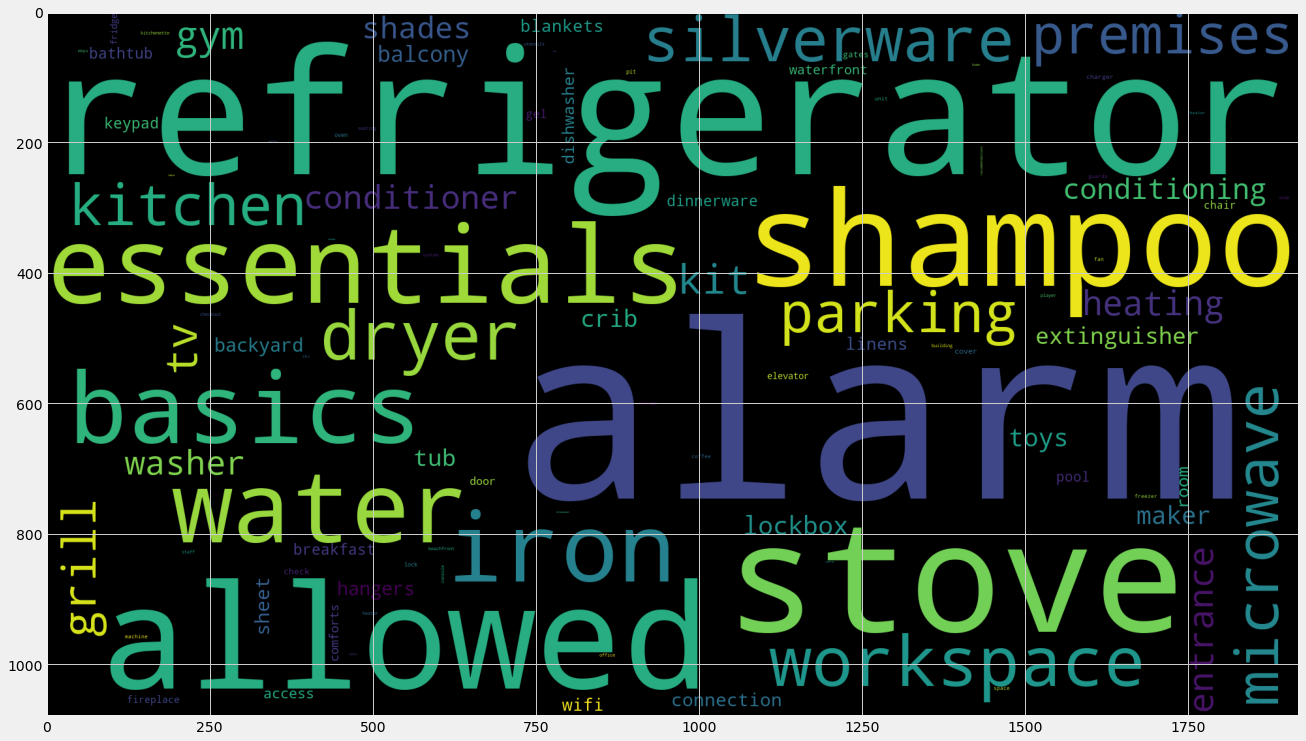

In [60]:
# Finding the frequently advertised amenities in the listings provided by all hosts

from wordcloud import WordCloud, STOPWORDS
words=''
stop=set(STOPWORDS)

for i in df['amenities']:
    i=str(i)
    st=i.split()
    for j in range(len(st)):
        st[j]=st[j].lower()
    words+=''.join(st[j])+''
wordcloud=WordCloud(width = 1920, height = 1080,stopwords=stop,collocations=False).generate(words)
plt.imshow(wordcloud)
plt.show()

In [61]:
worddf=pd.DataFrame(wordcloud.words_.items(),columns=['Word','Importance'])
worddf.head(10)

,Word,Importance
0,alarm,1.000000
1,refrigerator,0.429928
2,stove,0.333034
3,allowed,0.297166
4,shampoo,0.243754
5,essentials,0.210144
6,water,0.180355
7,basics,0.174449
8,iron,0.166401
9,workspace,0.155487


In [62]:
df['amenities']=df['amenities'].str.lower()

In [63]:
# Removing string which encloses the list

from ast import literal_eval
def safe_literal_eval(node): 
     try:
        return literal_eval(node)
     except ValueError:
        return None
df['amenities']=df['amenities'].apply(safe_literal_eval)

In [64]:
df['amenities'].isnull().sum()

1

In [65]:
df['amenities'].fillna(method='ffill',inplace=True)

In [66]:
# Creating a dictionary for word and its importances
dictionary={i:j for i,j in zip(worddf['Word'],worddf['Importance'])}
dictionary

{'alarm': 1.0,
 'refrigerator': 0.42992791593086876,
 'stove': 0.333034189271343,
 'allowed': 0.29716585125785255,
 'shampoo': 0.24375416147989462,
 'essentials': 0.2101438786440089,
 'water': 0.1803549199548389,
 'basics': 0.17444923718264194,
 'iron': 0.16640129693425584,
 'workspace': 0.155487363575833,
 'dryer': 0.15021856816142198,
 'silverware': 0.12375879338795125,
 'microwave': 0.11371334279014561,
 'kitchen': 0.1037547404684017,
 'parking': 0.10054135425411806,
 'premises': 0.09498306458616797,
 'grill': 0.0662941840604464,
 'tv': 0.058390990938829865,
 'kit': 0.049995657586196916,
 'gym': 0.04464001389572417,
 'entrance': 0.03581043916278262,
 'heating': 0.034884057551457605,
 'washer': 0.03384187823871696,
 'conditioner': 0.0318733173146513,
 'shades': 0.02698086442984107,
 'conditioning': 0.024259618446573837,
 'lockbox': 0.018788177054685464,
 'maker': 0.018093390846191704,
 'toys': 0.017948643719422168,
 'crib': 0.016588020727788554,
 'tub': 0.015401094288278377,
 'exting

In [67]:
# words in amentities columns
words=list(df['amenities'])

# words in wordcloud
keep_words=list(worddf['Word'])

In [68]:
# Retaining the words present wordcloud matching with the amenities column
for i in range(len(words)):
    words[i] = [d for d in words[i] if d in keep_words]

In [69]:
df['amenities']=words

In [70]:
df['amenities']=df['amenities'].apply(lambda i: list(map(dictionary.get,i)))

In [71]:
# Imputing the sum of importances 
df['amenities_score']=df['amenities'].apply(lambda x: sum(x))

### Creating a amenities_count column

In [72]:
# function for finding the length of amenities column
def lenam(x):
    return len(x)

In [73]:
df['amenities_count']=df['amenities'].apply(lenam)

### Creating a Region column

In [74]:
df['State'].unique()

array(['California', 'Illinois', 'Florida', 'Hawaii', 'Nevada',
       'New York ', 'Tennessee', 'DC', 'Washington'], dtype=object)

We divide the states based on the US regions.
* California - West
* Illinois - Middle West
* Florida - South East
* Hawaii - West
* Nevada - West
* New York - North East
* Tennessee - South East
* Washington - West
* DC - West

In [75]:
state={'California': 'West', 'Illinois': 'Middle West', 'Florida':'South East', 'Hawaii': 'West', 'Nevada': 'West',
       'New York ': 'North East', 'Tennessee':'South East', 'DC':'West', 'Washington':'West'}

In [76]:
df['Region']=df['State'].map(state)

### Creating a neighbourhood state column

In [77]:
df['neighbourhood_group'].unique()

array(['Los Angeles', 'San Diego County', 'San Francisco', 'San Mateo',
       'Saint Clara County', ' Santa Cruz', 'Chicago', 'Broward County',
       'Hawaii', 'Kauai', 'Maui', 'Honolulu', 'Clark County', 'Manhattan',
       'Brooklyn', 'Queens', 'Staten Island', 'Bronx', 'Nashville',
       'Washington D.C', 'Seattle'], dtype=object)

Let us divide the Counties into their states
* 'Los Angeles', CA
* 'San Diego County', CA 
* 'San Francisco', CA
* 'San Mateo', CA
* 'Saint Clara County', CA
* 'Santa Cruz', CA
* 'Chicago', IL
* 'Broward County', FL
* 'Hawaii', HI
* 'Kauai', HI
* 'Maui', HI
* 'Honolulu', HI 
* 'Clark County', NV 
* 'Manhattan', NY
* 'Brooklyn', NY
* 'Queens', NY
* 'Staten Island', NY 
* 'Bronx', NY
* 'Nashville', TN
* 'Washington D.C', DC 
* 'Seattle', WA

In [78]:
county={'Los Angeles':'CA', 'San Diego County':'CA', 'San Francisco':'CA', 'San Mateo':'CA',
       'Saint Clara County':'CA', ' Santa Cruz':'CA', 'Chicago':'IL', 'Broward County':'FL',
       'Hawaii':'HI', 'Kauai':'HI', 'Maui':'HI', 'Honolulu':'HI', 'Clark County':'NV', 'Manhattan':'NY',
       'Brooklyn':'NY', 'Queens':'NY', 'Staten Island':'NY', 'Bronx':'NY', 'Nashville':'TN',
       'Washington D.C':'DC', 'Seattle':'WA'}

In [79]:
df['neighbourhood_state']=df['neighbourhood_group'].map(county)

### Creating a neighborhood market column

In [80]:
neighborhood=df.groupby(['neighbourhood'])['price'].median().to_dict()
df['neighborhood_market']=df['neighbourhood'].map(neighborhood)

### Creating a property_rate column

In [81]:
mapped_PT=df.groupby(['property_type'])['price'].median()

In [82]:
df['property_rate']=df['property_type'].map(mapped_PT)

### Creating a property_budget column

In [83]:
# converting property type to lowercase
df['property_type']=df['property_type'].str.lower()

In [84]:
df['property_type']=df['property_type'].str.split().str[-1]

In [85]:
df['property_type'].unique()

array(['condominium', 'apartment', 'house', 'guesthouse', 'loft', 'hotel',
       'suite', 'bungalow', 'townhouse', 'island', 'hostel', 'villa',
       'cottage', 'cabin', 'stay', 'camper/rv', 'place', 'aparthotel',
       'treehouse', 'room', 'castle', 'barn', 'breakfast', 'yurt', 'boat',
       'tipi', 'campsite', 'tent', 'chalet', 'resort', 'floor', 'train',
       'home/apt', 'minsu', 'dorm', 'igloo', 'cave', 'particular',
       'lighthouse', 'home', 'hut', 'houseboat', 'in-law', 'bus',
       'windmill', 'timeshare', 'lodge'], dtype=object)

In [86]:
target_price=df.groupby(['property_type'])['price'].mean().to_dict()

In [87]:
df['property_budget']=df['property_type'].map(target_price)

In [88]:
df['property_budget']

0         219.337096
1         150.252569
2         150.252569
3         150.252569
4         252.521027
             ...    
158244    159.402676
158245    159.402676
158246    252.521027
158247    159.402676
158248    219.337096
Name: property_budget, Length: 158184, dtype: float64

In [89]:
df['property_budget']=pd.cut(df['property_budget'],bins=4,labels=['Low','Moderate','High','Luxury'],)

## Analysis of various columns

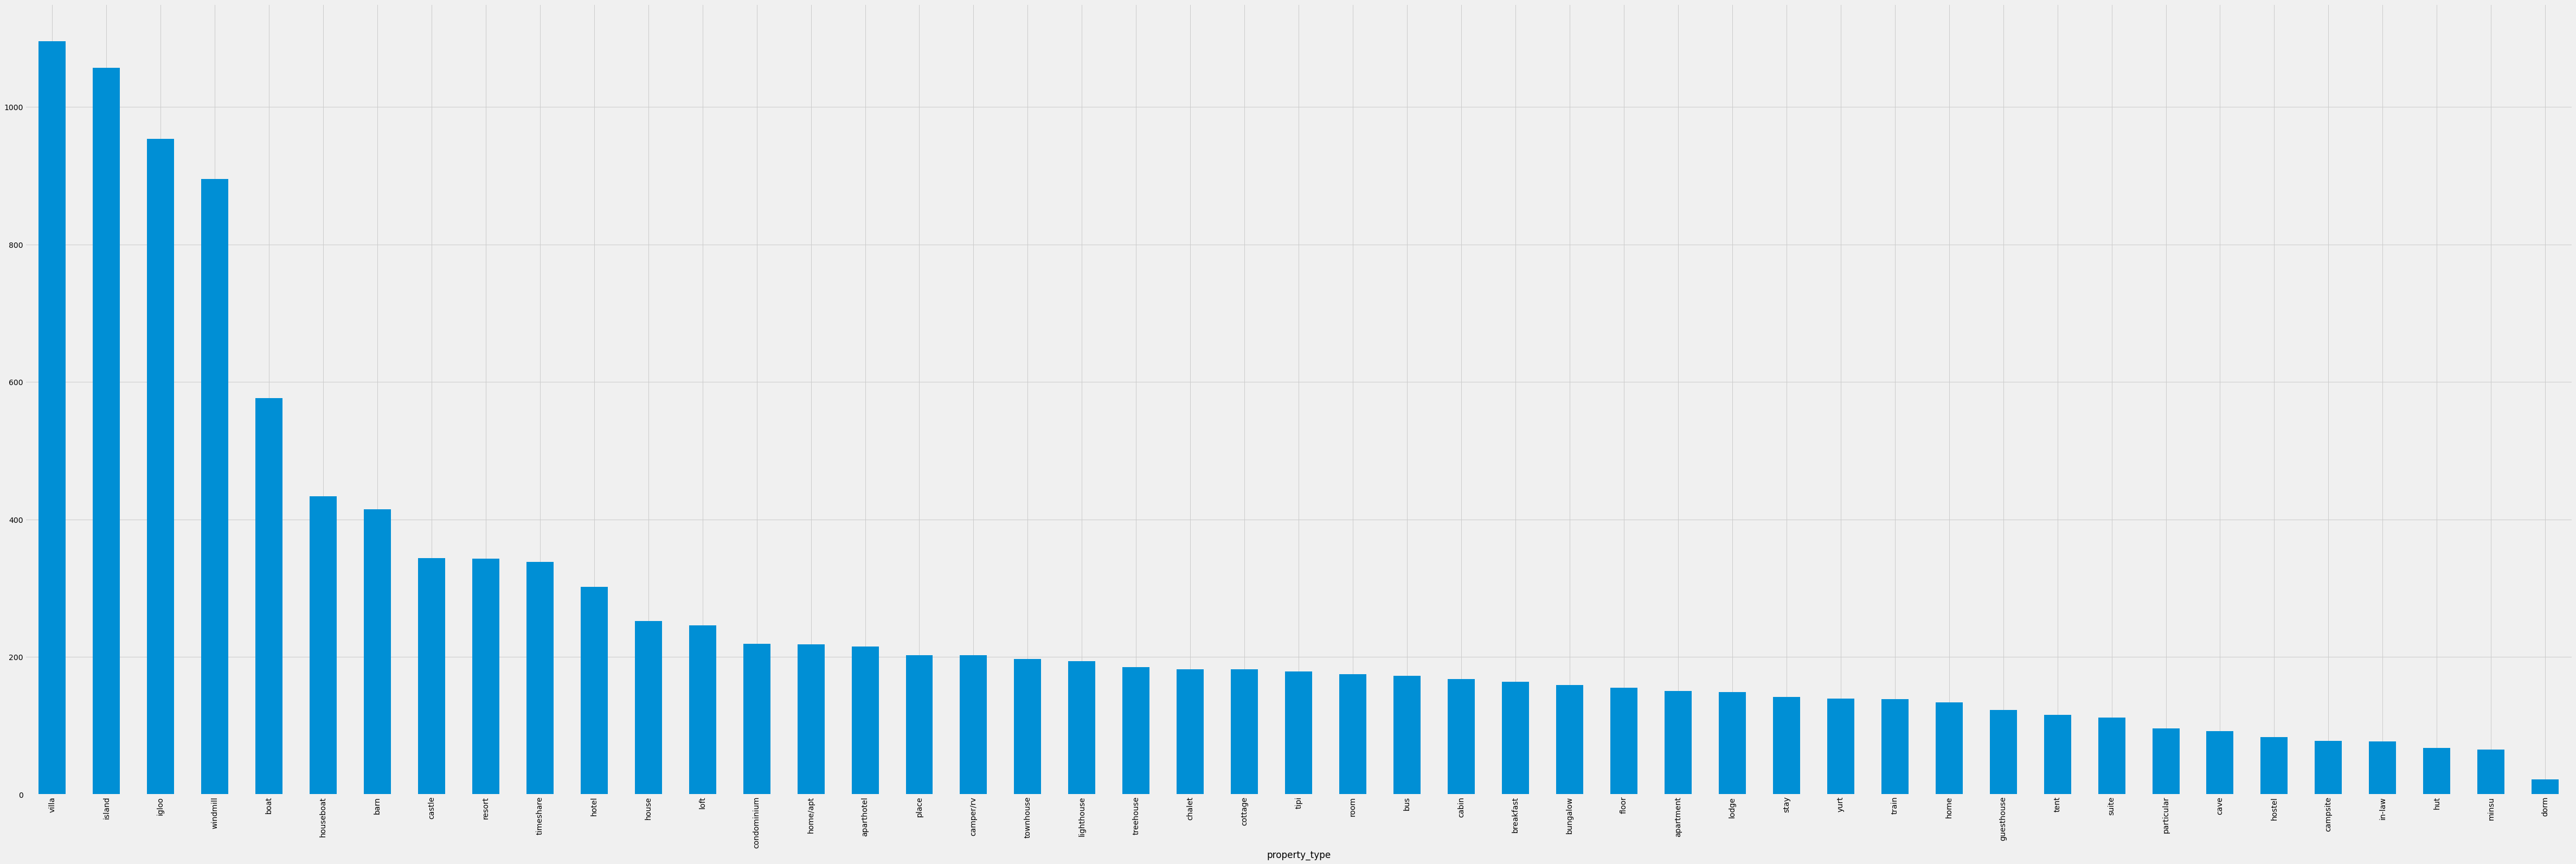

In [90]:
#Finding relationship between Property_type and Room_type

plt.rcParams['figure.figsize']=[75,25]
plt.xticks(rotation=90)
df.groupby(['property_type'])['price'].describe().sort_values(by='mean',ascending=False)['mean'].plot(kind='bar')
plt.show()

In [91]:
df.groupby(['property_type',"room_type"])['price'].mean().sort_values(ascending=False)

property_type  room_type      
island         Entire home/apt    1500.000000
villa          Entire home/apt    1438.965350
igloo          Entire home/apt    1145.000000
windmill       Entire home/apt     895.000000
lighthouse     Private room        700.000000
                                     ...     
stay           Shared room          32.000000
bungalow       Shared room          30.085714
train          Private room         30.000000
cave           Shared room          20.000000
dorm           Shared room          19.333333
Name: price, Length: 120, dtype: float64

* room type is based on property type -- so we can ignore the property type column

### Dropping the unnecessary columns

In [92]:
df_cleaned=df.drop(columns=['name','host_name','id','host_id','State','neighbourhood_group','amenities',
                            "reviews_per_month","host_since_yr","host_since_mnth",'property_type','neighbourhood','last_review_yr','last_review_mnth']).copy(deep=True)

In [93]:
pd.set_option('display.max_columns',50)
print(df_cleaned.shape)
df_cleaned.head(1)

(158184, 26)


,host_is_superhost,host_identity_verified,instant_bookable,accommodates,latitude,longitude,room_type,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,calculated_host_listings_count,availability_365,review_category,host_months,host_rank,amenities_score,amenities_count,Region,neighbourhood_state,neighborhood_market,property_rate,property_budget
0,f,t,f,6,33.98209,-118.38494,Entire home/apt,2.0,2.0,3.0,115,30,730,2,1,216,Recent,138.0,Long Term,1.071621,13,West,CA,118.0,173.0,Low


## Outliers Checking

In [94]:
num_cols = df_cleaned.select_dtypes(include=np.number).columns

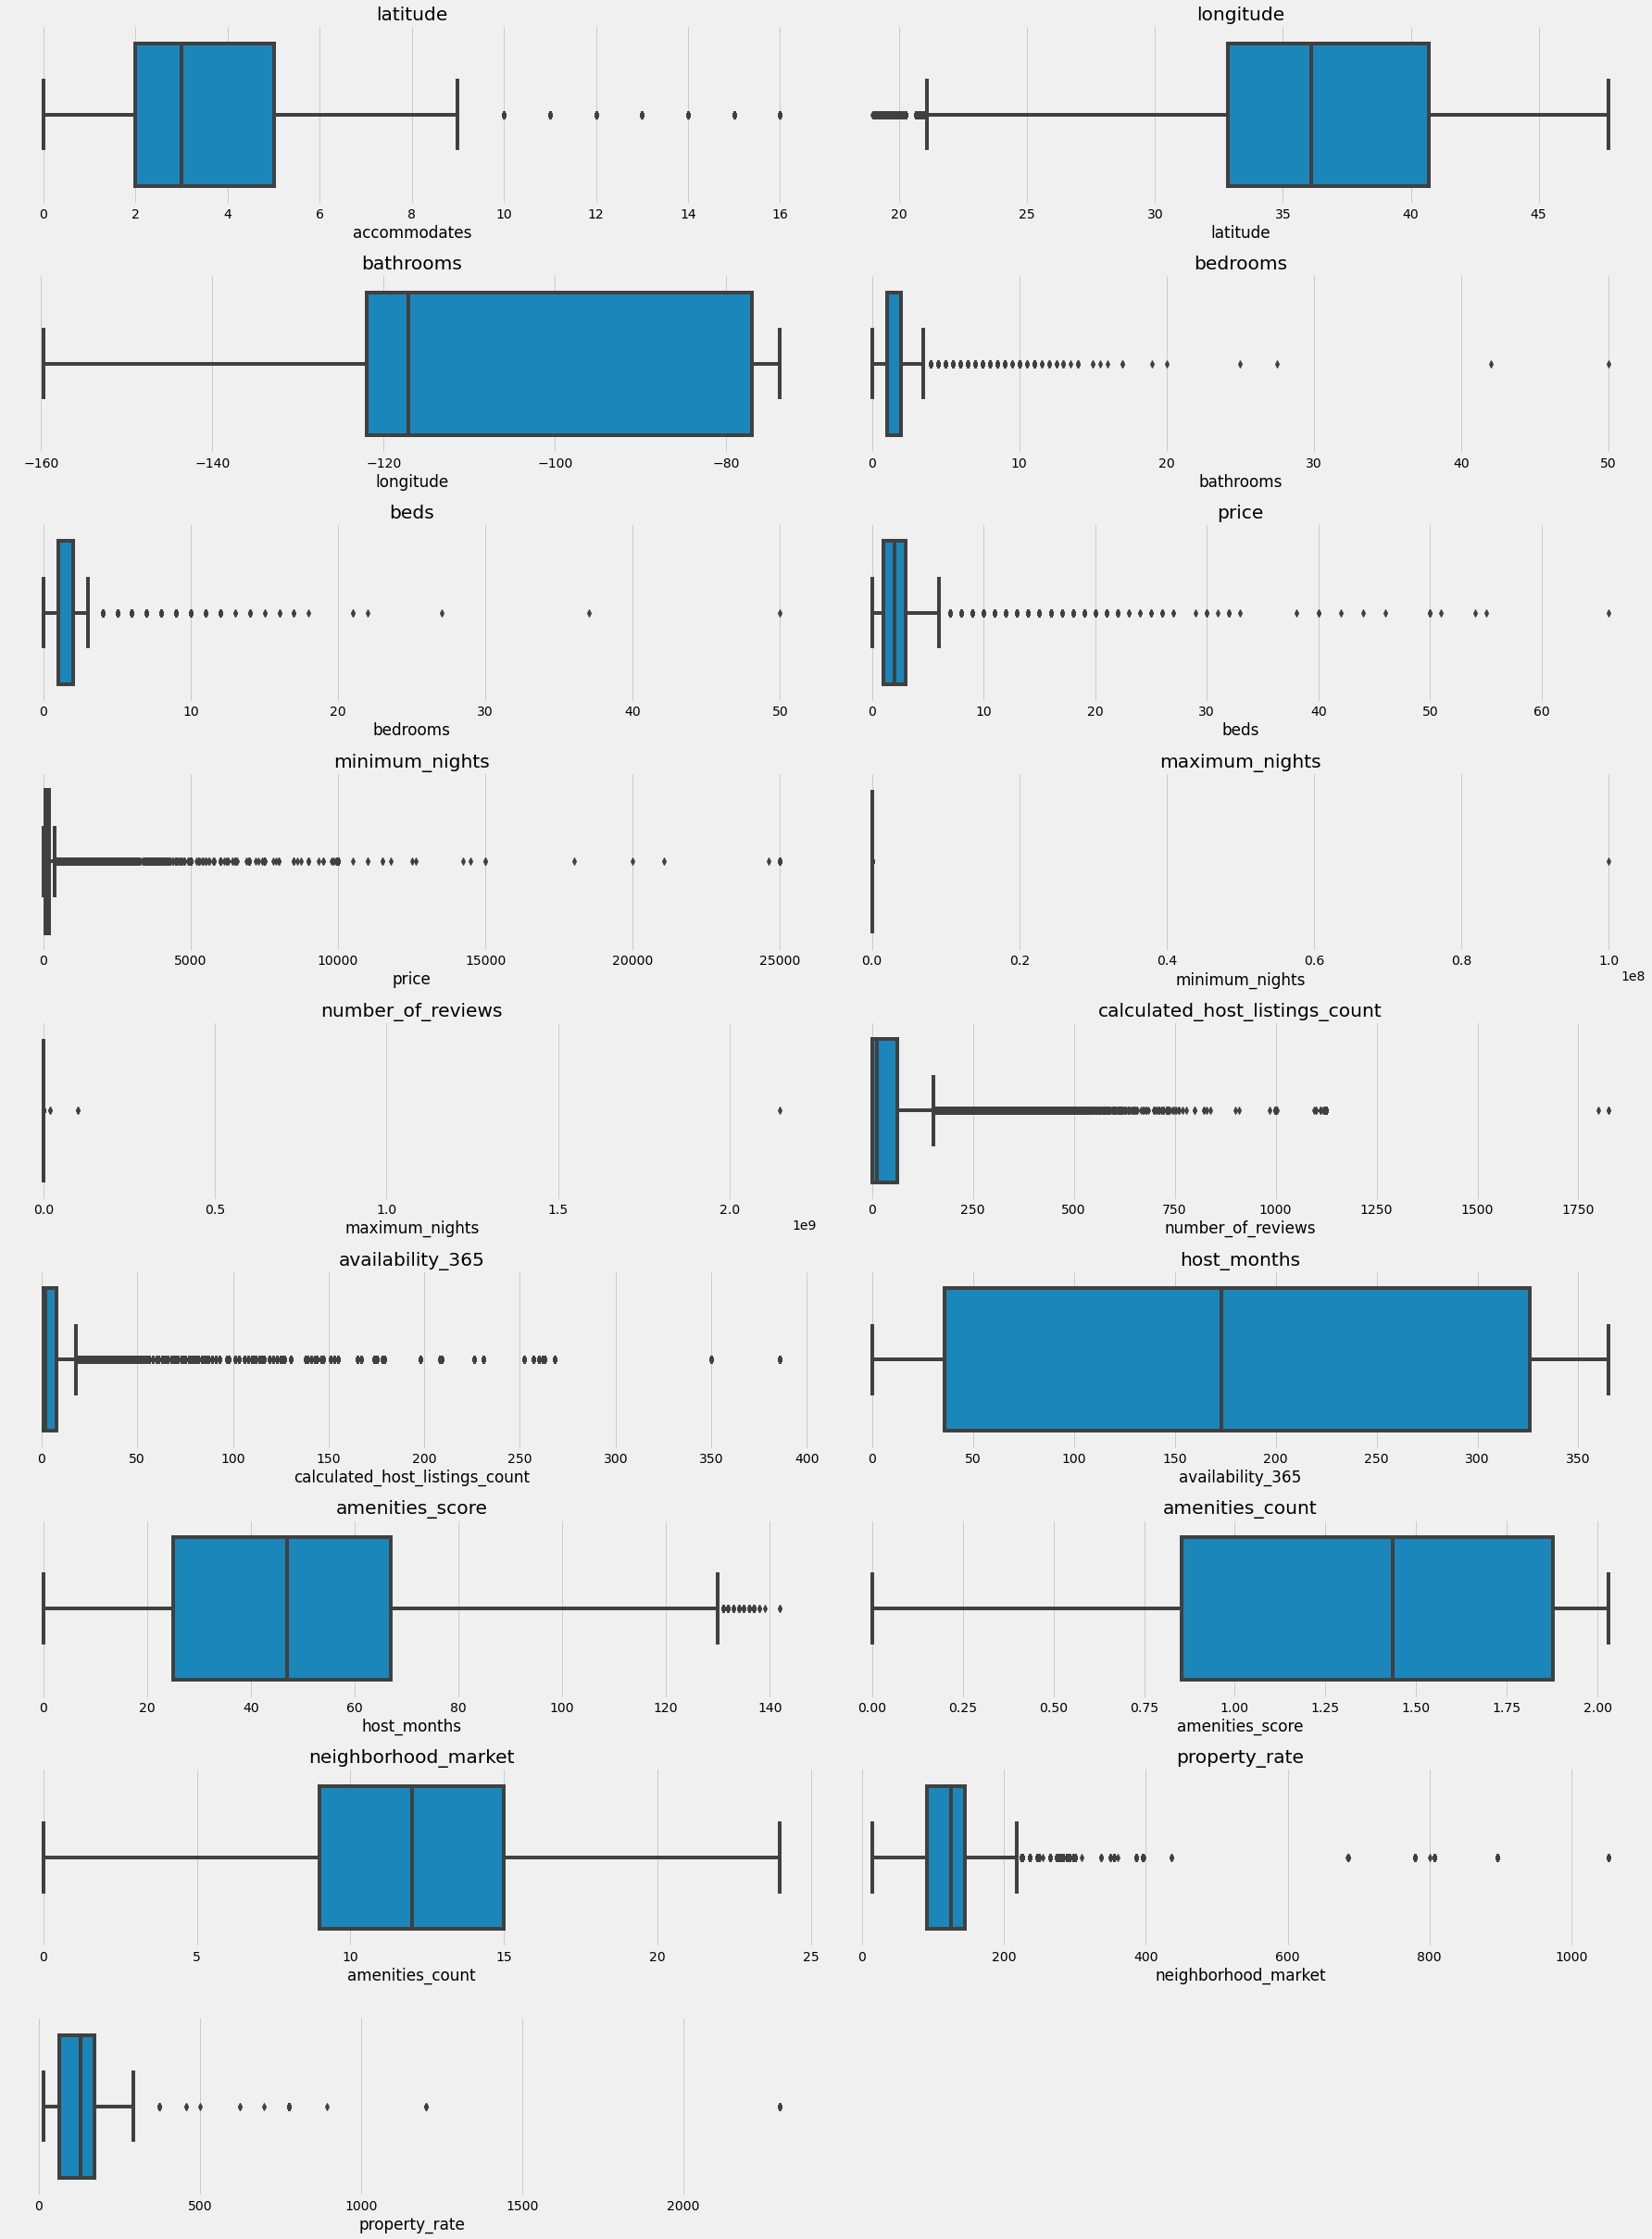

In [95]:
iterator=1
plt.rcParams['figure.figsize']=[25,37]
for i in num_cols:
    plt.title(i)
    plt.subplot(10,2,iterator)
    sns.boxplot(df_cleaned[i])
    iterator+=1
plt.tight_layout()
plt.show()

In [96]:
# IQR method 

q1=df_cleaned.quantile(0.25)
q3=df_cleaned.quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [97]:
out_count={}
for i in list(num_cols):
    print(i)
    print(df_cleaned[(df_cleaned[i] > ul[i]) | (df_cleaned[i] < ll[i])][i])
    out_count.update({i:len(df_cleaned[(df_cleaned[i] > ul[i]) | (df_cleaned[i] < ll[i])][i])})
    print()
    

accommodates
107       10
124       15
177       10
247       12
300       16
          ..
157419    10
157479    12
157509    10
157615    13
157924    16
Name: accommodates, Length: 7514, dtype: int64

latitude
72862    20.040950
72863    20.027400
72864    19.431190
72865    19.564130
72868    20.754700
           ...    
94472    20.724040
94474    20.933380
94476    20.938539
94481    20.968876
94484    19.487739
Name: latitude, Length: 12192, dtype: float64

longitude
Series([], Name: longitude, dtype: float64)

bathrooms
51        11.0
107        6.5
124        4.0
126       11.0
139       11.0
          ... 
156013     4.5
156133     4.0
156706     5.0
156871     4.0
157924     4.0
Name: bathrooms, Length: 3579, dtype: float64

bedrooms
95        4.0
107       6.0
124       5.0
177       5.0
270       5.0
         ... 
157780    4.0
157887    4.0
157924    7.0
158110    4.0
158216    4.0
Name: bedrooms, Length: 8721, dtype: float64

beds
177        9.0
240        7.0
300       

In [98]:
# Count of outliers present in each column
out_count

{'accommodates': 7514,
 'latitude': 12192,
 'longitude': 0,
 'bathrooms': 3579,
 'bedrooms': 8721,
 'beds': 3767,
 'price': 13978,
 'minimum_nights': 2080,
 'maximum_nights': 33,
 'number_of_reviews': 21593,
 'calculated_host_listings_count': 27552,
 'availability_365': 0,
 'host_months': 123,
 'amenities_score': 0,
 'amenities_count': 0,
 'neighborhood_market': 11945,
 'property_rate': 1481}

## Scaling columns

In [99]:
df_sc=df_cleaned.copy(deep=True)

In [100]:
df_sc.isnull().sum()

host_is_superhost                 0
host_identity_verified            0
instant_bookable                  0
accommodates                      0
latitude                          0
longitude                         0
room_type                         0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
review_category                   0
host_months                       0
host_rank                         0
amenities_score                   0
amenities_count                   0
Region                            0
neighbourhood_state               0
neighborhood_market               0
property_rate                     0
property_budget                   0
dtype: int64

In [101]:
# Numerical columns
df_sc.select_dtypes(include=np.number).columns

Index(['accommodates', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'host_months', 'amenities_score', 'amenities_count',
       'neighborhood_market', 'property_rate'],
      dtype='object')

In [102]:
ncols=['accommodates','bathrooms',
       'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'host_months']

In [103]:
# Scaling the needed colums with MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()

for i in ncols:
    df_sc[i] = mm.fit_transform(df_sc[[i]])

In [104]:
df_sc.head(2)

,host_is_superhost,host_identity_verified,instant_bookable,accommodates,latitude,longitude,room_type,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,calculated_host_listings_count,availability_365,review_category,host_months,host_rank,amenities_score,amenities_count,Region,neighbourhood_state,neighborhood_market,property_rate,property_budget
0,f,t,f,0.3750,33.98209,-118.38494,Entire home/apt,0.04,0.04,0.045455,115,2.900000e-07,3.399327e-07,0.001096,0.000000,0.591781,Recent,0.971831,Long Term,1.071621,13,West,CA,118.0,173.0,Low
1,t,t,t,0.0625,34.09768,-118.34602,Private room,0.03,0.02,0.015152,71,2.900000e-07,1.704320e-07,0.014795,0.002597,0.986301,Recent,0.950704,Long Term,1.898590,17,West,CA,117.0,65.0,Low


## Statistical Analysis

In [105]:
num_cols = df_sc.select_dtypes(include = np.number).columns
num_cols

Index(['accommodates', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'host_months', 'amenities_score', 'amenities_count',
       'neighborhood_market', 'property_rate'],
      dtype='object')

### Performing ttest for Numerical columns

In [106]:
from scipy import stats 

In [107]:
# Get important features from the numerical variables
significant_features=[]
for i in num_cols:
    if i !="price":
        if stats.ttest_ind(df[i], df['price'])[1] < 0.05:
            print(i, stats.ttest_ind(df[i], df['price'])[1])
            significant_features.append(i)
        else:
             print(i, stats.ttest_ind(df[i], df['price'])[1])

accommodates 0.0
latitude 0.0
longitude 0.0
bathrooms 0.0
bedrooms 0.0
beds 0.0
minimum_nights 0.4846115718214714
maximum_nights 0.25601766258318526
number_of_reviews 0.0
calculated_host_listings_count 0.0
availability_365 3.584388599256184e-92
host_months 0.0
amenities_score 0.0
amenities_count 0.0
neighborhood_market 0.0
property_rate 0.0


In [108]:
print('Significant features :',significant_features)

Significant features : ['accommodates', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'host_months', 'amenities_score', 'amenities_count', 'neighborhood_market', 'property_rate']


### Performing Anova test for Categorical columns

In [109]:
cat_cols

Index(['name', 'host_name', 'host_since', 'host_is_superhost',
       'host_identity_verified', 'instant_bookable', 'amenities', 'State',
       'neighbourhood_group', 'neighbourhood', 'property_type', 'room_type',
       'last_review'],
      dtype='object')

In [110]:
from statsmodels.formula.api  import ols
import statsmodels.api as sm
mod = ols('price ~ room_type', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#Since Pvalue is lesser than 0.05 , room_type is a significant variable

                 sum_sq        df           F  PR(>F)
room_type  7.312867e+08       3.0  992.440899     0.0
Residual   3.885200e+10  158180.0         NaN     NaN


In [111]:
from statsmodels.formula.api  import ols
import statsmodels.api as sm
mod = ols('price ~ State', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#Since Pvalue is lesser than 0.05 , State is a significant variable

                sum_sq        df           F  PR(>F)
State     4.103636e+08       8.0  207.124149     0.0
Residual  3.917292e+10  158175.0         NaN     NaN


In [112]:
from statsmodels.formula.api  import ols
import statsmodels.api as sm
mod = ols('price ~ neighbourhood_group', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#Since Pvalue is lesser than 0.05 , neighbourhood_group is a significant variable

                           sum_sq        df           F  PR(>F)
neighbourhood_group  5.167389e+08      20.0  104.602247     0.0
Residual             3.906655e+10  158163.0         NaN     NaN


In [113]:
from statsmodels.formula.api  import ols
import statsmodels.api as sm
mod = ols('price ~ instant_bookable', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#Since Pvalue is lesser than 0.05 , instant_bookable is a significant variable

                        sum_sq        df         F    PR(>F)
instant_bookable  1.992860e+06       1.0  7.964233  0.004772
Residual          3.958129e+10  158182.0       NaN       NaN


In [114]:
from statsmodels.formula.api  import ols
import statsmodels.api as sm
mod = ols('price ~ host_is_superhost', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#Since Pvalue is lesser than 0.05 , host_is_superhost is a significant variable

                         sum_sq        df          F        PR(>F)
host_is_superhost  6.849973e+06       1.0  27.378474  1.674955e-07
Residual           3.957643e+10  158182.0        NaN           NaN


# Encoding

In [115]:
df_sc.select_dtypes(exclude=np.number).columns

Index(['host_is_superhost', 'host_identity_verified', 'instant_bookable',
       'room_type', 'review_category', 'host_rank', 'Region',
       'neighbourhood_state', 'property_budget'],
      dtype='object')

In [116]:
print('No of unique values in host_is_superhost : ',df['host_is_superhost'].nunique())
print('No of unique values in host_identity_verified: ',df['host_identity_verified'].nunique())
print('No of unique values in instant_bookable: ',df['instant_bookable'].nunique())
df[["host_is_superhost","host_identity_verified","instant_bookable"]].head()
# Label encoding - since there are only two levels present in these columns

No of unique values in host_is_superhost :  2
No of unique values in host_identity_verified:  2
No of unique values in instant_bookable:  2


,host_is_superhost,host_identity_verified,instant_bookable
0,f,t,f
1,t,t,t
2,f,t,f
3,f,t,t
4,t,t,f


In [117]:
tfd={'t':1,'f':0}

In [118]:
df_sc['host_is_superhost']=df_sc['host_is_superhost'].map(tfd)
df_sc['host_identity_verified']=df_sc['host_identity_verified'].map(tfd)
df_sc['instant_bookable']=df_sc['instant_bookable'].map(tfd)

In [119]:
df_sc.select_dtypes(exclude=np.number).columns

Index(['room_type', 'review_category', 'host_rank', 'Region',
       'neighbourhood_state', 'property_budget'],
      dtype='object')

In [120]:
# One-Hot encoding for other features
final_df = pd.get_dummies(df_sc,drop_first=True)

In [121]:
final_df.shape

(158184, 41)

In [122]:
final_df.head()

,host_is_superhost,host_identity_verified,instant_bookable,accommodates,latitude,longitude,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,calculated_host_listings_count,availability_365,host_months,amenities_score,amenities_count,neighborhood_market,property_rate,room_type_Hotel room,room_type_Private room,room_type_Shared room,review_category_Recent,review_category_Unknown,host_rank_Middle Term,host_rank_Novice,Region_North East,Region_South East,Region_West,neighbourhood_state_DC,neighbourhood_state_FL,neighbourhood_state_HI,neighbourhood_state_IL,neighbourhood_state_NV,neighbourhood_state_NY,neighbourhood_state_TN,neighbourhood_state_WA,property_budget_Moderate,property_budget_High,property_budget_Luxury
0,0,1,0,0.3750,33.98209,-118.38494,0.04,0.04,0.045455,115,2.900000e-07,3.399327e-07,0.001096,0.000000,0.591781,0.971831,1.071621,13,118.0,173.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0.0625,34.09768,-118.34602,0.03,0.02,0.015152,71,2.900000e-07,1.704320e-07,0.014795,0.002597,0.986301,0.950704,1.898590,17,117.0,65.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0.0625,34.00475,-118.48127,0.02,0.02,0.015152,155,0.000000e+00,8.381903e-08,0.011507,0.002597,0.923288,0.950704,1.338969,11,138.0,65.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0.1250,33.87619,-118.11397,0.02,0.02,0.015152,50,2.900000e-07,3.399327e-07,0.000000,0.000000,0.000000,0.950704,1.215326,10,70.0,129.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0.1250,33.98750,-118.43200,0.02,0.02,0.015152,60,2.900000e-07,5.238689e-07,0.169863,0.010390,0.923288,0.894366,1.029152,10,122.5,65.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Base Model

### Linear statstical model

In [123]:
import statsmodels.api as sma

X=final_df.drop('price',axis=1)
y=final_df['price']

newx = sma.add_constant(X)

model_lr = sma.OLS(y,newx).fit()

model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:56:01   Log-Likelihood:            -1.1905e+06
No. Observations:              158184   AIC:                         2.381e+06
Df Residuals:                  158146   BIC:                         2.381e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            504.3721    190.388      2.649      0.008     131.216     877.528
host_is_superhost                  4.0946      2.574      1.591      0.112      -0.950       9.139
host_identity_verified            -7.8400      2.898     -2.705      0.007     -13.520      -2.160
instant_bookable                  -6.3672      2.435     -2.615      0.009     -11.140      -1.595
accommodates                     121.6995     14.498      8.394      0.000      93.284     150.115
latitude                          31.1376      5.251      5.930      0.000      20.847      41.429
longitude                         21.5939      4.638      4.656      0.000      12.503      30.684
bathrooms                       5593.4240     98.997     56.501      0.000    5399.392    5787.456
bedrooms                        3207.2856    119.040     26.943      0.000    2973.969    3440.602
beds                            -853.6029     76.755    -11.121      0.000   -1004.040    -703.165
minimum_nights                   -73.4765    449.599     -0.163      0.870    -954.680     807.727
maximum_nights                   -51.4786    448.671     -0.115      0.909    -930.865     827.908
number_of_reviews                 20.9220     10.586      1.976      0.048       0.174      41.670
calculated_host_listings_count   -13.1759     10.101     -1.304      0.192     -32.973       6.621
availability_365                  -9.5560      3.094     -3.089      0.002     -15.620      -3.492
host_months                       -7.6312     13.430     -0.568      0.570     -33.953      18.691
amenities_score                  -47.5689      5.392     -8.822      0.000     -58.137     -37.000
amenities_count                    2.1467      0.733      2.930      0.003       0.711       3.583
neighborhood_market                1.0513      0.020     53.294      0.000       1.013       1.090
property_rate                      0.4630      0.024     19.214      0.000       0.416       0.510
room_type_Hotel room              30.6182     13.700      2.235      0.025       3.766      57.471
room_type_Private room            -7.0386      3.621     -1.944      0.052     -14.135       0.058
room_type_Shared room            -62.6474      9.149     -6.848      0.000     -80.578     -44.716
review_category_Recent           -13.7157     11.016     -1.245      0.213     -35.307       7.875
review_category_Unknown           73.0315     11.175      6.535      0.000      51.129      94.934
host_rank_Middle Term             -6.4389      5.226     -1.232      0.218     -16.682       3.804
host_rank_Novice                 -10.7126      8.424     -1.272      0.203     -27.223       5.798
Region_North East               -179.3975     28.062     -6.393      0.000    -234.398    -124.397
Region_South E

### Linear Regression Assumptions:
* Linearity
* Normality
* Heteroscedasticity
* Autocorrelation of errors
* Multicollinearity

### Linearity

* Ho: Model is linear

* H1: Model is not linear

In [124]:
from statsmodels.stats.diagnostic import linear_rainbow
fstat,pval=linear_rainbow(model_lr)
pval>0.05

True

**Null hypothesis is accepted that model is linear.**

### Normality

* Ho: Data is normal    

* H1: Data is not normal

In [125]:
fstat,pval=stats.jarque_bera(model_lr.resid)
pval>0.05

False

**Null hypothesis is rejected so the data is not normal.**

### Heteroscedasticity
* Ho: Data has equal variance (Not heteroscedastic)
    
* H1: Data has unequal variance (Heteroscedastic)

In [126]:
import statsmodels.stats.api as ssa

In [127]:
test,pval,f_stat,fp=ssa.het_breuschpagan(model_lr.resid, model_lr.model.exog)
pval>0.05

False

**Null hypothesis is rejected so the data has heteroscedasticity.**

### Multi Collinearity

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X.values,i))

vif=pd.DataFrame({'Variables':X.columns, 'VIF':vif})
vif

,Variables,VIF
0,host_is_superhost,1.152666e+00
1,host_identity_verified,1.047704e+00
2,instant_bookable,1.145389e+00
3,accommodates,4.502991e+00
4,latitude,1.041073e+03
5,longitude,1.319802e+04
6,bathrooms,2.369738e+00
7,bedrooms,4.681389e+00
8,beds,3.383386e+00
9,minimum_nights,1.002402e+00


Region , neighbourhood states , review category, latitude , longitude all columns are having multi collinearity

### Autocorrelation of errors

In [129]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_lr.resid)

1.6567433184742668

**This is an ideal value denoting there is no autocorrelation of errors.**

## Splitting the data

In [130]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=.8,random_state=42)

print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(126547, 40) (31637, 40)
(126547,) (31637,)


In [131]:
# !pip install mlxtend

### Feature Selection

In [132]:
# Forward selection
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector
sfs=SequentialFeatureSelector(estimator=lr,n_jobs=-1,k_features='best',cv=5,verbose=2,scoring='r2')

In [133]:
sfs.fit(xtrain,ytrain)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.9s finished

[2022-12-22 13:56:15] Features: 1/40 -- score: 0.12554582758113714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  39 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.6s finished

[2022-12-22 13:56:16] Features: 2/40 -- score: 0.15871858298997432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  38 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.8s finished

[2022-12-22 13:56:17] Features: 3/40 -- score: 0.1742615059149495[Parallel(n_jobs=-1)]: Using backend LokyBackend wi

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    4.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.8s finished

[2022-12-22 13:57:42] Features: 26/40 -- score: 0.1985315721796414[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    4.7s finished

[2022-12-22 13:57:47] Features: 27/40 -- score: 0.19853211476332408[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  13 | elapsed:    3.5s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  10 out of  13 | elapsed:    3.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.9s finished

[2022-12-22 13:57:51] Features: 28/40 -- score: 0.19852941256565437[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 40),
                          n_jobs=-1, scoring='r2', verbose=2)

In [134]:
k_features=list(sfs.k_feature_names_)
len(k_features)

35

In [135]:
# Utilizing the features obtained from feature selection
X1 = xtrain.loc[:,k_features]

In [136]:
# Building model with obtanied features
newx = sma.add_constant(X1)

model_lr = sma.OLS(ytrain,newx).fit()

model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     893.7
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:58:21   Log-Likelihood:            -9.5101e+05
No. Observations:              126547   AIC:                         1.902e+06
Df Residuals:                  126511   BIC:                         1.902e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            686.9495    264.764      2.595      0.009     168.017    1205.882
host_is_superhost                  5.8401      2.846      2.052      0.040       0.262      11.418
host_identity_verified            -7.3007      3.203     -2.279      0.023     -13.579      -1.023
instant_bookable                  -6.8985      2.692     -2.563      0.010     -12.175      -1.622
accommodates                     118.3972     15.897      7.448      0.000      87.239     149.555
latitude                          31.4429      5.810      5.412      0.000      20.056      42.830
longitude                         21.8390      5.131      4.256      0.000      11.782      31.896
bathrooms                       5400.4135    108.716     49.675      0.000    5187.333    5613.494
bedrooms                        3388.9960    130.442     25.981      0.000    3133.333    3644.659
beds                            -950.9420     84.703    -11.227      0.000   -1116.959    -784.925
number_of_reviews                 33.1009     11.690      2.831      0.005      10.188      56.014
calculated_host_listings_count   -22.5881     11.156     -2.025      0.043     -44.454      -0.722
availability_365                  -7.9821      3.422     -2.332      0.020     -14.690      -1.274
host_months                      -15.7737     14.849     -1.062      0.288     -44.878      13.331
amenities_score                  -49.4880      5.953     -8.313      0.000     -61.156     -37.820
amenities_count                    2.3663      0.809      2.924      0.003       0.780       3.953
neighborhood_market                1.0805      0.022     49.605      0.000       1.038       1.123
property_rate                      0.4703      0.027     17.634      0.000       0.418       0.523
room_type_Hotel room              41.5187     15.265      2.720      0.007      11.600      71.437
room_type_Private room            -6.3346      4.004     -1.582      0.114     -14.182       1.512
room_type_Shared room            -59.7898     10.144     -5.894      0.000     -79.671     -39.908
review_category_Recent           -15.6865     12.195     -1.286      0.198     -39.588       8.215
review_category_Unknown           72.1337     12.371      5.831      0.000      47.887      96.380
host_rank_Middle Term             -7.3533      5.779     -1.272      0.203     -18.680       3.973
host_rank_Novice                 -14.6570      9.311     -1.574      0.115     -32.907       3.593
Region_North East               -531.4075    116.401     -4.565      0.000    -759.551    -303.264
Region_West                      624.9448    151.271      4.131      0.000     328.457     921.433
neighbourhood_state_DC         -1041.0120    239.958     -4.338      0.000   -1511.325    -570.699
neighbourhood_

**R-Squared value obtained is Sightly Higher than the base model**

## Recursive Feature Elimination

In [137]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=lr,n_features_to_select=29,verbose=2,importance_getter='coef_')
rfe.fit(xtrain,ytrain)

Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.


RFE(estimator=LinearRegression(), importance_getter='coef_',
    n_features_to_select=29, verbose=2)

In [138]:
rfe_cols=pd.DataFrame(rfe.ranking_,index=X.columns).sort_values(by=0,ascending=False)[:29].index
rfe_cols

Index(['property_rate', 'neighborhood_market', 'host_rank_Middle Term',
       'host_rank_Novice', 'host_identity_verified', 'amenities_count',
       'calculated_host_listings_count', 'host_is_superhost',
       'availability_365', 'instant_bookable', 'neighbourhood_state_NV',
       'neighbourhood_state_IL', 'neighbourhood_state_HI',
       'neighbourhood_state_NY', 'neighbourhood_state_TN',
       'neighbourhood_state_DC', 'Region_West', 'neighbourhood_state_WA',
       'property_budget_Moderate', 'property_budget_High', 'Region_South East',
       'Region_North East', 'neighbourhood_state_FL', 'room_type_Private room',
       'review_category_Unknown', 'review_category_Recent',
       'room_type_Shared room', 'room_type_Hotel room', 'amenities_score'],
      dtype='object')

In [139]:
# Utilizing the features obtained from feature elimination
X2=xtrain.loc[:,rfe_cols]

In [140]:
newx = sma.add_constant(X2)

model_lr = sma.OLS(ytrain,newx).fit()

model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     751.0
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:58:22   Log-Likelihood:            -9.5591e+05
No. Observations:              126547   AIC:                         1.912e+06
Df Residuals:                  126520   BIC:                         1.912e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -154.0848     10.762    -14.318      0.000    -175.178    -132.992
property_rate                      1.6236      0.018     89.597      0.000       1.588       1.659
neighborhood_market                1.2859      0.022     57.910      0.000       1.242       1.329
host_rank_Middle Term             -2.7118      4.143     -0.654      0.513     -10.833       5.409
host_rank_Novice                   0.4218      4.458      0.095      0.925      -8.315       9.159
host_identity_verified            -3.0104      3.322     -0.906      0.365      -9.522       3.502
amenities_count                    8.4589      0.835     10.135      0.000       6.823      10.095
calculated_host_listings_count   -34.9072     11.502     -3.035      0.002     -57.450     -12.364
host_is_superhost                  0.8689      2.954      0.294      0.769      -4.921       6.659
availability_365                  10.8357      3.546      3.056      0.002       3.885      17.786
instant_bookable                 -15.6416      2.786     -5.615      0.000     -21.102     -10.182
neighbourhood_state_NV           -74.7548      5.973    -12.516      0.000     -86.461     -63.049
neighbourhood_state_IL           -32.9677      6.051     -5.449      0.000     -44.827     -21.108
neighbourhood_state_HI           -60.2067      4.476    -13.450      0.000     -68.980     -51.433
neighbourhood_state_NY           -17.2185      2.108     -8.167      0.000     -21.350     -13.086
neighbourhood_state_TN           -41.4519      4.932     -8.404      0.000     -51.119     -31.785
neighbourhood_state_DC            -0.5839      6.428     -0.091      0.928     -13.182      12.014
Region_West                      -37.0555      4.179     -8.867      0.000     -45.246     -28.865
neighbourhood_state_WA           -44.2742      8.216     -5.389      0.000     -60.378     -28.170
property_budget_Moderate         -19.5693      8.966     -2.183      0.029     -37.142      -1.996
property_budget_High             287.3941     61.755      4.654      0.000     166.356     408.433
Region_South East                -66.8430      3.602    -18.556      0.000     -73.904     -59.783
Region_North East                -17.2185      2.108     -8.167      0.000     -21.350     -13.086
neighbourhood_state_FL           -25.3912      4.333     -5.860      0.000     -33.884     -16.898
room_type_Private room            47.3220      3.638     13.009      0.000      40.193      54.451
review_category_Unknown           84.0341     12.836      6.547      0.000      58.876     109.192
review_category_Recent           -16.3412     12.665     -1.290      0.197     -41.164       8.482
room_type_Shared room             68.8881     10.047      6.857      0.000      49.197      88.579
room_type_Hote

**R-Squared value obtained is lower than the base model and SFS model**

Inferences:

1. There is not much of a pattern with latitude and longitude but the coefficients adds value to the model.
2. Coefficient for No of reviews is greater than null treated reviews per month so we can remove them.
3. Sequential feature selection performs slightly better than RFE.

### sklearn - Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [142]:
lr.fit(xtrain,ytrain)
pred_lr=lr.predict(xtest)
pred_lr_tr = lr.predict(xtrain)

# evaluation metrics
lrmodel_rmse=np.sqrt(mean_squared_error(ytest,pred_lr))
lrmodel_rmse_tr=np.sqrt(mean_squared_error(ytrain,pred_lr_tr))
lrmodel_mae=mean_absolute_error(ytest,pred_lr)
lrmodel_mae_tr=mean_absolute_error(ytrain,pred_lr_tr)
lrmodel_mape=mean_absolute_percentage_error(ytest,pred_lr)

print('train rmse:',lrmodel_rmse_tr,'\nrmse:',lrmodel_rmse,'\ntrain mae:',lrmodel_mae_tr,'\nmae:',lrmodel_mae,'\nmape:',lrmodel_mape)

train rmse: 444.15444856071804 
rmse: 468.00715159483417 
train mae: 121.41592142991848 
mae: 120.30804601363589 
mape: 0.8101807824678247


## Robust Models
Note: Median is robust to outliers, hence MAE is a better metric for Huber than mean

### Huber Regression

In [143]:
from sklearn.linear_model import HuberRegressor

huber=HuberRegressor()
huber.fit(xtrain,ytrain)
huber_pred_tr=huber.predict(xtrain)
huber_pred=huber.predict(xtest)

In [144]:
np.sqrt(mean_squared_error(ytrain,huber_pred_tr)),np.sqrt(mean_squared_error(ytest,huber_pred))

(470.49018902179915, 492.8405613030458)

In [145]:
mean_absolute_error(ytrain,huber_pred_tr),mean_absolute_error(ytest,huber_pred) 

(100.95767930055283, 99.748701822698)

In [146]:
mean_absolute_percentage_error(ytest,huber_pred)

0.4391259868776479

### RANSAC method

In [147]:
from sklearn.linear_model import RANSACRegressor

ransac=RANSACRegressor(base_estimator=lr,random_state=42)

ransac.fit(xtrain,ytrain)
ransac_pred_tr=ransac.predict(xtrain)
ransac_pred=ransac.predict(xtest)

In [148]:
np.sqrt(mean_squared_error(ytrain,ransac_pred_tr)),np.sqrt(mean_squared_error(ytest,ransac_pred))

(119289.48151601394, 512.5875784463733)

In [149]:
mean_absolute_error(ytrain,ransac_pred_tr),mean_absolute_error(ytest,ransac_pred)

(556.9836958801272, 121.40960960021512)

In [150]:
mean_absolute_percentage_error(ytest,ransac_pred)

0.6060338117587881

### Theil-Sen Regression

In [151]:
from sklearn.linear_model import TheilSenRegressor

ts=TheilSenRegressor(random_state=42)
ts.fit(xtrain,ytrain)
ts_pred_tr=ts.predict(xtrain)
ts_pred=ts.predict(xtest)

In [152]:
np.sqrt(mean_squared_error(ytrain,ts_pred_tr)),np.sqrt(mean_squared_error(ytest,ts_pred))

(118332.62891613493, 854.4091478743594)

In [153]:
mean_absolute_error(ytrain,ts_pred_tr),mean_absolute_error(ytest,ts_pred)

(617.2856802106112, 279.7428749351033)

In [154]:
mean_absolute_percentage_error(ytest,ts_pred)

2.6995298766565146

In [155]:
linear_models=pd.DataFrame()

## Decision Tree

In [156]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(random_state=42)

dtmodel=dt.fit(xtrain,ytrain)
dtpred_tr=dtmodel.predict(xtrain)
dtpred=dtmodel.predict(xtest)

In [157]:
np.sqrt(mean_squared_error(ytrain,dtpred_tr)),np.sqrt(mean_squared_error(ytest,dtpred))

(1.3871407477139936, 579.9080986770153)

In [158]:
mean_absolute_error(ytrain,dtpred_tr),mean_absolute_error(ytest,dtpred)

(0.06176089963141415, 110.160610773383)

In [159]:
mean_absolute_percentage_error(ytest,dtpred)

0.5516596602315438

## Regularization Models

In [160]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## Ridge

In [161]:
ridge=Ridge(normalize=True)
ridge.fit(xtrain,ytrain)
rid_pred=ridge.predict(xtest)
rid_pred_tr=ridge.predict(xtrain)

In [162]:
np.sqrt(mean_squared_error(ytrain,rid_pred_tr)),np.sqrt(mean_squared_error(ytest,rid_pred))

(450.0813118904749, 473.2884676868219)

In [163]:
mean_absolute_error(ytrain,rid_pred_tr),mean_absolute_error(ytest,rid_pred)

(108.78103961956263, 108.10542928671944)

In [164]:
mean_absolute_percentage_error(ytest,rid_pred)

0.6758427462054966

## Lasso

In [165]:
lasso=Lasso(normalize=True)
lasso.fit(xtrain,ytrain)
las_pred=lasso.predict(xtest)
las_pred_tr=lasso.predict(xtrain)

In [166]:
np.sqrt(mean_squared_error(ytrain,las_pred_tr)),np.sqrt(mean_squared_error(ytest,las_pred))

(496.0346907839338, 516.6984726042349)

In [167]:
mean_absolute_error(ytrain,las_pred_tr),mean_absolute_error(ytest,las_pred)

(154.4089497688718, 153.0571309319713)

In [168]:
mean_absolute_percentage_error(ytest,las_pred)

1.3012328088625165

## Elastic Net


In [169]:
enet=ElasticNet(normalize=True)
enet.fit(xtrain,ytrain)
enet_pred=enet.predict(xtest)
enet_pred_tr=enet.predict(xtrain)

In [170]:
np.sqrt(mean_squared_error(ytrain,enet_pred_tr)),np.sqrt(mean_squared_error(ytest,enet_pred))

(496.0346907839338, 516.6984726042349)

In [171]:
mean_absolute_error(ytrain,enet_pred_tr),mean_absolute_error(ytest,enet_pred)

(154.4089497688718, 153.0571309319713)

In [172]:
mean_absolute_percentage_error(ytest,enet_pred)

1.3012328088625165

## Random Forest

In [173]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_rf_tr=rf.predict(xtrain)
pred_rf=rf.predict(xtest)

In [174]:
np.sqrt(mean_squared_error(ytrain,pred_rf_tr)),np.sqrt(mean_squared_error(ytest,pred_rf))

(148.61625874569557, 430.4376098051565)

In [175]:
mean_absolute_error(ytrain,pred_rf_tr),mean_absolute_error(ytest,pred_rf)

(32.34995041320834, 84.65117167504295)

In [176]:
mean_absolute_percentage_error(ytest,pred_rf)

0.4597600984105229

## Bagging

In [177]:
from sklearn.ensemble import BaggingRegressor

br=BaggingRegressor(bootstrap=True)
br.fit(xtrain,ytrain)
br_pred=br.predict(xtest)
br_pred_tr=br.predict(xtrain)

In [178]:
np.sqrt(mean_squared_error(ytrain,br_pred_tr)),np.sqrt(mean_squared_error(ytest,br_pred))

(182.3754464522025, 439.11396251108107)

In [179]:
mean_absolute_error(ytrain,br_pred_tr),mean_absolute_error(ytest,br_pred)

(36.03497976062061, 89.07114138260283)

In [180]:
mean_absolute_percentage_error(ytest,br_pred)

0.47481929111543336

## Boosting 

### Ada Boost

In [181]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(xtrain,ytrain)
ada_pred=ada.predict(xtest)
ada_pred_tr=ada.predict(xtrain)

In [182]:
np.sqrt(mean_squared_error(ytrain,ada_pred_tr)),np.sqrt(mean_squared_error(ytest,ada_pred))

(532.5940368641086, 552.905446231194)

In [183]:
mean_absolute_error(ytrain,ada_pred_tr),mean_absolute_error(ytest,ada_pred)

(362.88223236167937, 362.2232666581587)

In [184]:
mean_absolute_percentage_error(ytest,ada_pred)

3.9354484770759535

### Gradient Boosting

In [185]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(xtrain,ytrain)
gbr_pred=ada.predict(xtest)
gbr_pred_tr=ada.predict(xtrain)

In [186]:
np.sqrt(mean_squared_error(ytrain,gbr_pred_tr)),np.sqrt(mean_squared_error(ytest,gbr_pred))

(532.5940368641086, 552.905446231194)

In [187]:
mean_absolute_error(ytrain,gbr_pred_tr),mean_absolute_error(ytest,gbr_pred)

(362.88223236167937, 362.2232666581587)

In [188]:
mean_absolute_percentage_error(ytest,gbr_pred)

3.9354484770759535

In [189]:
# !pip install xgboost

### XG Boost

In [190]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(xtrain,ytrain)
pred_xbgr=xgbr.predict(xtest)
pred_xbgr_tr=xgbr.predict(xtrain)

In [191]:
np.sqrt(mean_squared_error(ytrain,pred_xbgr_tr)),np.sqrt(mean_squared_error(ytest,pred_xbgr))

(206.68015237647856, 399.131945908214)

In [192]:
mean_absolute_error(ytrain,pred_xbgr_tr),mean_absolute_error(ytest,pred_xbgr)

(71.36463221402718, 88.54466556274839)

In [193]:
mean_absolute_percentage_error(ytest,pred_xbgr)

0.5036551940775625

## Stacking Model

In [194]:
from sklearn.ensemble import StackingRegressor

huber=HuberRegressor()
rf=RandomForestRegressor()
xgbr=XGBRegressor()

base=[('huber',huber),('rf',rf),('xgbr',xgbr)]
final=rf

In [201]:
stack=StackingRegressor(estimators=base, final_estimator=final)
stack.fit(xtrain,ytrain)
pred_stack=stack.predict(xtest)
pred_stack_tr=stack.predict(xtrain)

In [202]:
np.sqrt(mean_squared_error(ytrain,pred_stack_tr)),np.sqrt(mean_squared_error(ytest,pred_stack))

(241.72829472496787, 400.4994162594468)

In [203]:
mean_absolute_error(ytrain,pred_stack_tr),mean_absolute_error(ytest,pred_stack)

(59.070402996321285, 86.52274651031276)

In [204]:
mean_absolute_percentage_error(ytest,pred_stack)

0.45411288474095907

## Parameter Tuning - Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
## Parameter Tuning 


from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
param_grid={
    'n_estimators':[100,200,300],
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_depth':[2,3,4,None],
    'max_features':[0.2]
}

cv=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=1,scoring='neg_mean_absolute_error')
cv.fit(xtrain,ytrain)
cv.best_params_

In [196]:
from sklearn.ensemble import RandomForestRegressor

rf_tuned=RandomForestRegressor(n_estimators=300,min_samples_leaf=1,min_samples_split=2,
                         max_features=0.2,random_state=0)
rf_tuned.fit(xtrain,ytrain)
pred_rf_tuned_tr=rf_tuned.predict(xtrain)
pred_rf_tuned_te=rf_tuned.predict(xtest)

In [197]:
np.sqrt(mean_squared_error(ytrain,pred_rf_tuned_tr)),np.sqrt(mean_squared_error(ytest,pred_rf_tuned_te))

(138.68355314440763, 411.6864613604141)

In [198]:
mean_absolute_error(ytrain,pred_rf_tuned_tr),mean_absolute_error(ytest,pred_rf_tuned_te)

(30.31573390875489, 80.9384117945001)

In [199]:
mean_absolute_error(ytrain,pred_rf_tuned_tr),mean_absolute_error(ytest,pred_rf_tuned_te)

(30.31573390875489, 80.9384117945001)

In [205]:
models=pd.DataFrame()
models['Model']=['Huber Regression','RANSAC Regression','Theil-Sen Regression',
                 'Linear Regression','Decision Tree','Random Forest','Bagging',
                 'AdaBoost','Gradient Boosting','XGBoost','Stacking Model',
                 'Random Forest Tuned','Ridge','Lasso','Elastic Net']

models['RMSE']=[np.sqrt(mean_squared_error(ytest,huber_pred)),np.sqrt(mean_squared_error(ytest,ransac_pred)),
                    np.sqrt(mean_squared_error(ytest,ts_pred)),np.sqrt(mean_squared_error(ytest,pred_lr)),
                    np.sqrt(mean_squared_error(ytest,dtpred)),np.sqrt(mean_squared_error(ytest,pred_rf)),
                    np.sqrt(mean_squared_error(ytest,br_pred)),np.sqrt(mean_squared_error(ytest,ada_pred)),
                    np.sqrt(mean_squared_error(ytest,gbr_pred)),np.sqrt(mean_squared_error(ytest,pred_xbgr)),
                    np.sqrt(mean_squared_error(ytest,pred_stack)),np.sqrt(mean_squared_error(ytest,pred_rf_tuned_te)),
                    np.sqrt(mean_squared_error(ytest,rid_pred)) , np.sqrt(mean_squared_error(ytest,las_pred)),
                    np.sqrt(mean_squared_error(ytest,enet_pred))]


models['MAE']=[mean_absolute_error(ytest,huber_pred),mean_absolute_error(ytest,ransac_pred),
                    mean_absolute_error(ytest,ts_pred),mean_absolute_error(ytest,pred_lr),
                    mean_absolute_error(ytest,dtpred),mean_absolute_error(ytest,pred_rf),
                    mean_absolute_error(ytest,br_pred),mean_absolute_error(ytest,ada_pred),
                    mean_absolute_error(ytest,gbr_pred),mean_absolute_error(ytest,pred_xbgr),
                    mean_absolute_error(ytest,pred_stack),mean_absolute_error(ytest,pred_rf_tuned_te),
                    mean_absolute_error(ytest,rid_pred),mean_absolute_error(ytest,las_pred),
                    mean_absolute_error(ytest,enet_pred)]

models['MAPE']=[mean_absolute_percentage_error(ytest,huber_pred),mean_absolute_percentage_error(ytest,ransac_pred),
                    mean_absolute_percentage_error(ytest,ts_pred),mean_absolute_percentage_error(ytest,pred_lr),
                    mean_absolute_percentage_error(ytest,dtpred),mean_absolute_percentage_error(ytest,pred_rf),
                    mean_absolute_percentage_error(ytest,br_pred),mean_absolute_percentage_error(ytest,ada_pred),
                    mean_absolute_percentage_error(ytest,gbr_pred),mean_absolute_percentage_error(ytest,pred_xbgr),
                    mean_absolute_percentage_error(ytest,pred_stack),mean_absolute_percentage_error(ytest,pred_rf_tuned_te),
                    mean_absolute_percentage_error(ytest,rid_pred),mean_absolute_percentage_error(ytest,las_pred),
                    mean_absolute_percentage_error(ytest,enet_pred)]
models.sort_values(by='MAPE',ascending=True)

,Model,RMSE,MAE,MAPE
0,Huber Regression,492.840561,99.748702,0.439126
11,Random Forest Tuned,411.686461,80.938412,0.442968
10,Stacking Model,400.499416,86.522747,0.454113
5,Random Forest,430.437610,84.651172,0.459760
6,Bagging,439.113963,89.071141,0.474819
9,XGBoost,399.131946,88.544666,0.503655
4,Decision Tree,579.908099,110.160611,0.551660
1,RANSAC Regression,512.587578,121.409610,0.606034
12,Ridge,473.288468,108.105429,0.675843
3,Linear Regression,468.007152,120.308046,0.810181


## Inference
* A total of 15 base models are built for prediction.
* Since we tend to proceed model building with outliers we prioritize the metrics MAE and MAPE.
* The reason is because MAE and MAPE deal with the median score which is robust to outliers compared to RMSE which is sensitive to them.
* The top three models on infering the MAE and MAPE score are Random forest regression model, Stacking regression model and Huber regression Model.
* Out of these three we found Random forest model to be promising and providing a generalized and ideal MAPE value 0.45 approx.
* On tuning the Random forest model through GridSearchCV we rebuild and find the MAPE value to be 0.43 approx which shows a minute improvement.

# Model deployment


In [206]:
def preprocessing(final_df):
    X = final_df.drop('price', axis = 1)
    y = final_df['price']
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state = 0)
    return x_train, x_test, y_train, y_test


In [208]:
#create api pipeline for deployment

from sklearn.pipeline import Pipeline
steps=[('rf_tuned',rf_tuned)]
pipeline=Pipeline(steps)
x_train,x_test,y_train,y_test=preprocessing(final_df)
ypred=pipeline.fit(x_train,y_train).predict(x_test)
print('RMSE of pipeline',np.sqrt(mean_squared_error(y_test,ypred)))
print('MAE of pipeline',mean_absolute_error(y_test,ypred))
print('MAPE of pipeline',mean_absolute_percentage_error(y_test,ypred))

RMSE of pipeline 389.89907037308717
MAE of pipeline 87.15532719966185
MAPE of pipeline 0.49377304394188837


In [209]:
## Save the pipeline as a Pickle File

import pickle
model = open('airbnb.pickle', 'wb')
pickle.dump(pipeline, model)
model.close()

In [210]:
pickle_model=pickle.load(open('airbnb.pickle','rb'))

In [211]:
pickle_model.predict(x_test)

array([ 52.66333333, 341.7       , 115.54285714, ..., 186.93666667,
       108.38006667, 113.45968992])

In [212]:
%%writefile app1.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
st.title('Host Optimal Price Prediction')

# Load Model

rf_model=pickle.load(open('airbnb.pickle','rb'))


# Create UI
host_is_superhost=st.selectbox('A superhost?',(0,1))
host_identity_verified=st.selectbox('Host verified?',(0,1))
instant_bookable=st.selectbox('Instantly Bookable',(0,1))
accommodates=st.selectbox('Number of accomodates',{6:0.375, 1:0.0625, 2:0.125 ,3:0.1875, 4:0.25,5: 0.3125, 8:0.5 ,7: 0.4375,
                                                      10:0.625 , 15:0.9375,12: 0.75 , 16:1.,9: 0.5625, 14:0.875 ,11: 0.6875,
                                                       13:0.8125,0:0.})
bathrooms=st.selectbox('Number of bathrooms',{2.:0.04,1.5:0.03,1.: 0.02,2.5:0.05,3.5:0.07,11.:0.22,3.:0.06,6.5:0.13,4.:0.08,
                                                  8.: 0.16,8.5: 0.17,0.:0.  ,4.5: 0.09,7.5: 0.15,5.: 0.1 ,0.5: 0.01,11.5: 0.23,
                                                  5.5: 0.11,6.:0.12,7.:0.14,9.: 0.18,12.5: 0.25,10.:0.2 ,12.: 0.24,13.:0.26,
                                                  9.5: 0.19,10.5: 0.21,25.:0.5 ,27.5:0.55,42.: 0.84, 20:0.4 ,14.: 0.28,13.5: 0.27,
                                                   17.:0.34,15.5: 0.31,19.:0.38,16.: 0.32,15.:0.3 ,50.:1.})
bedrooms=st.selectbox('Number of bedrooms',{2.:0.04,1.:0.02,3.:0.06,4.:0.08,6.:0.12,5.:0.1 ,7.:0.14,9.:0.18,8.:0.16,11.:0.22,12.:0.24,
                                               10.:0.2,13.:0.26,50:1.,21.:0.42,14.:0.28,0.:0.,17.:0.34,16.:0.32,22.:0.44,15.:0.3 ,18.:0.36,
                                               37.:0.74,27:0.54})
beds=st.selectbox('Number of beds',{3.:0.04545455,1.: 0.01515152, 2.:0.03030303,0.: 0.,4.: 0.06060606,
                                       5.:0.07575758,6.: 0.09090909,9.:0.13636364,7.: 0.10606061,8.: 0.12121212,
                                       11.:0.16666667,15.: 0.22727273,10.: 0.15151515,14.: 0.21212121,16.: 0.24242424,
                                       12.:0.18181818,19.: 0.28787879,13.: 0.1969697 ,50.: 0.75757576,22.: 0.33333333,
                                       32.:0.48484848,18.: 0.27272727,21.: 0.31818182,20.: 0.3030303 ,23.: 0.34848485,
                                       44.:0.66666667,17.: 0.25757576,26.: 0.39393939,54.: 0.81818182,38.: 0.57575758,
                                       25.:0.37878788, 30.:0.45454545,42.: 0.63636364,24.: 0.36363636,33.:0.5,
                                       27.:0.40909091, 31.:0.46969697, 40.:0.60606061,29.: 0.43939394,66.: 1.,
                                       55.: 0.83333333, 46.:0.6969697 ,51.: 0.77272727})
minimum_nights=st.selectbox('Minimum number of nights',{30:2.90000003e-07,1:0.00000000e+00, 2:1.00000001e-08, 31:3.00000003e-07,
                                                         3:2.00000002e-08,5: 4.00000004e-08,4: 3.00000003e-08,32:3.10000003e-07,
                                                         7:6.00000006e-08,180:1.79000002e-06})
maximum_nights=st.selectbox('Maximum number of nights',{730:3.39932740e-07, 366:1.70432031e-07,180: 8.38190318e-08,1125: 5.23868948e-07,
                                                         90:4.19095159e-08,7: 3.25962901e-09,365: 1.69966370e-07,150: 6.98491931e-08,
                                                         120:5.58793545e-08, 60:2.79396773e-08})
number_of_reviews=st.selectbox('Reviews count',{2:1.09589041e-03,27:1.47945205e-02, 21:1.15068493e-02, 0:0.00000000e+00,
                                                 310:1.69863014e-01,230:1.26027397e-01,128:7.01369863e-02,22: 1.20547945e-02,
                                                 12:6.57534247e-03,241: 1.32054795e-01})
availability_365=st.selectbox('Days of availability',{216:0.59178082,360: 0.98630137, 337:0.92328767,0: 0.,332: 0.90958904,
                                                        154:0.42191781,329: 0.90136986, 119:0.3260274 ,49: 0.13424658,349:0.95068493})
amenities_count=st.selectbox('Number of amenities',[13, 17, 11, 10,  9, 16, 18,  5,  7, 14, 15,  8, 12,  6,  4,  3,  0,
                                                    2, 20, 19, 21,  1, 22, 23, 24])

# User to model input

data={'A superhost?':host_is_superhost,
     'Host verified?':host_identity_verified,
     'Instantly Bookable':instant_bookable,
     'Number of accomodates':accommodates,
     'latitude':22.0515,
     'longitude':-159.33409,
     'Number of bathrooms':bathrooms,
     'Number of bedrooms':bedrooms,
     'Number of beds':beds,
     'Minimum number of nights':minimum_nights,
     'Maximum number of nights':maximum_nights,
     'Reviews count':number_of_reviews,
     'calculated_host_listings_count':0.01298701, 
     'Days of availability':availability_365,
     'host_months':0.92253521,
     'amenities_score':1.89859016,
     'Number of amenities':amenities_count,
     'neighborhood_market':118.,'property_rate':173.,
     'room_type_Hotel room':1, 'room_type_Private room':0,
     'room_type_Shared room':0, 'review_category_Recent':1,
     'review_category_Unknown':0, 'host_rank_Middle Term':0, 'host_rank_Novice':0,
     'Region_North East':0, 'Region_South East':1, 'Region_West':0,
     'neighbourhood_state_DC':0, 'neighbourhood_state_FL':1,
     'neighbourhood_state_HI':0, 'neighbourhood_state_IL':0,
     'neighbourhood_state_NV':0, 'neighbourhood_state_NY':0,
     'neighbourhood_state_TN':0, 'neighbourhood_state_WA':0,
     'property_budget_Moderate':1, 'property_budget_High':0,
     'property_budget_Luxury':0}

in_data=pd.DataFrame([data])
predictions=rf_model.predict(in_data)[0]

if st.button('Predict'):
    st.write(predictions)

st.subheader('Host Price')

Writing app1.py
